In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install SciencePlots

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.getcwd())
import scienceplots
plt.style.use(['science','grid','notebook'])

/content


# Load the train data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_supervised.csv", encoding="utf8")
train_data.head()
#train_data.info()  #No column has null/missing values.


,author,subreddit,created_utc,body
0,Shamus_Aran,mylittlepony,1.388534e+09,I don't think we'd get nearly as much fanficti...
1,Riddance,sex,1.388534e+09,"Thanks. I made it up, that's how I got over my..."
2,Secret_Wizard,DragonsDogma,1.388534e+09,Are you sure you aren't confusing Cyclops (the...
3,Penultimatum,malefashionadvice,1.388534e+09,dont do this to me bro
4,7-SE7EN-7,todayilearned,1.388534e+09,That's what we do when we can't find a mate


In [ ]:
unique_counts = train_data.nunique()
for i in range(len(unique_counts)):
    print(f'Number of unique values in {unique_counts.index[i]} =  {unique_counts.values[i]}')
print(f'Number of total samples of dataset is {len(train_data)}')

Number of unique values in author =  5000
Number of unique values in subreddit =  3468
Number of unique values in created_utc =  278142
Number of unique values in body =  289608
Number of total samples of dataset is 296042


In [ ]:
missing_data = train_data.isnull().sum()
for i in range(len(unique_counts)):
    print(f'Number of missed values in {missing_data.index[i]} =  {missing_data.values[i]}')


Number of missed values in author =  0
Number of missed values in subreddit =  0
Number of missed values in created_utc =  0
Number of missed values in body =  0


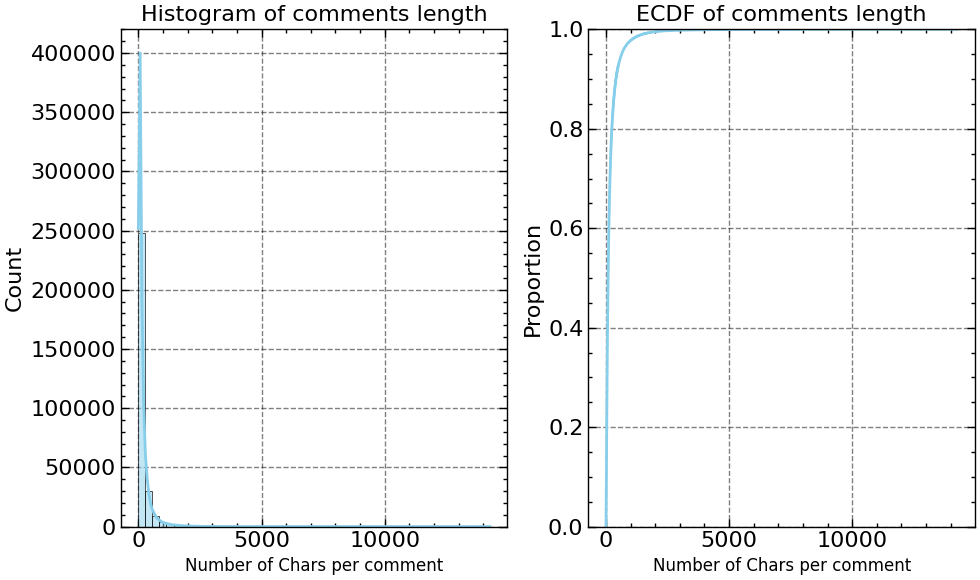

0         101
1          66
2         342
3          22
4          43
         ... 
296037     41
296038    126
296039    128
296040     50
296041     58
Name: comment_length, Length: 296042, dtype: int64

In [ ]:
train_data['comment_length'] = train_data['body'].apply(lambda i: len(str(i)))

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(train_data['comment_length'], bins=50, kde=True, color='skyblue', ax=ax[0])
ax[0].set_xlabel('Number of Chars per comment', fontsize=12)
ax[0].set_title('Histogram of comments length')

sns.ecdfplot(train_data['comment_length'], color='skyblue', ax=ax[1])
ax[1].set_xlabel('Number of Chars per comment', fontsize=12)
ax[1].set_title('ECDF of comments length')
plt.tight_layout()
plt.show()

train_data['comment_length']

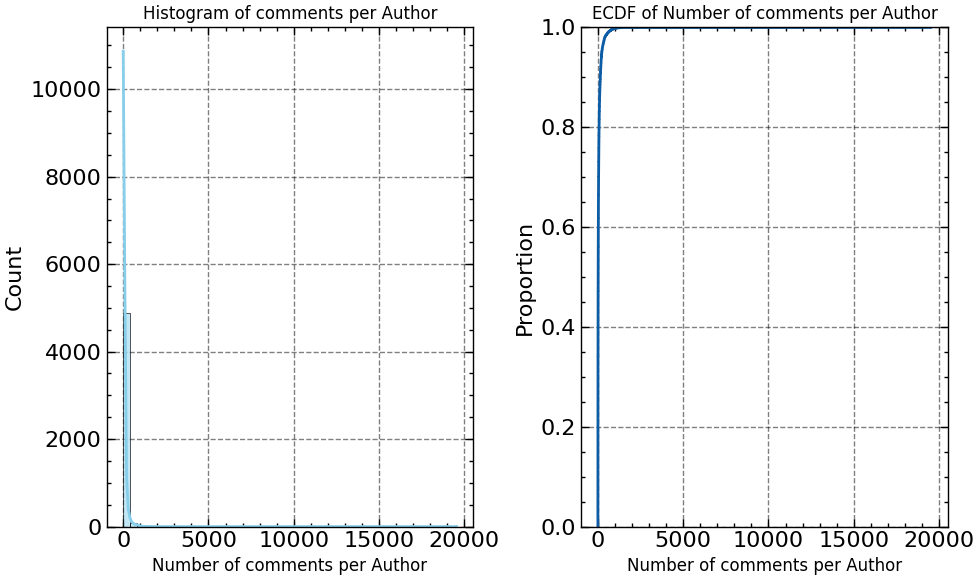

author
morbiusgreen           19534
ProtoKun7               1524
IfImLateDontWait        1383
blaghart                1339
kkjdroid                1251
                       ...  
ss15                       1
LilBillysChubbyTits        1
SheltieNoises              1
oneIozz                    1
emptyRR                    1
Name: count, Length: 5000, dtype: int64

In [ ]:
# Group the data by author and count the number of comments per author
comments_per_author = train_data['author'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(comments_per_author,bins=50,kde=True,color='skyblue',ax=ax[0])
ax[0].set_xlabel('Number of comments per Author',fontsize=12)
ax[0].set_title('Histogram of comments per Author',fontsize=12)

# Alternatively, plot an ECDF
sns.ecdfplot(comments_per_author,ax=ax[1])
ax[1].set_title('ECDF of Number of comments per Author',fontsize=12)
ax[1].set_xlabel('Number of comments per Author',fontsize=12)
plt.tight_layout()
plt.show()

comments_per_author

In [ ]:
target = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/target_supervised.csv")
print(target.info())
target.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  5000 non-null   object
 1   gender  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None


,author,gender
0,RedThunder90,0
1,Lirkmor,1
2,In0chi,0
3,ProjectGrudge,0
4,TehTurtleHermit,0


<ipython-input-11-4e9bd1e2b0ab>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


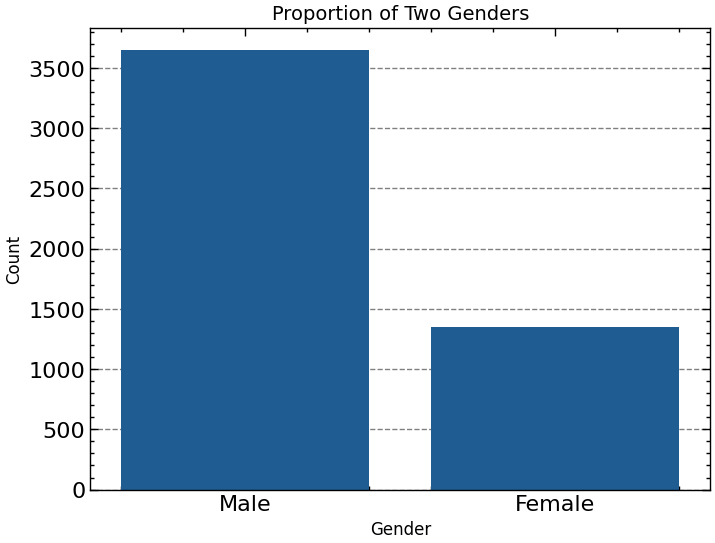

In [ ]:
gender_counts = target['gender'].value_counts()
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Proportion of Two Genders', fontsize=14)
ax.set_xticklabels(['Male', 'Female'])
plt.show()

In [ ]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=a6667cdab3b52c240c79cdad50b604f4011a6ad0b11fdc303d3e274c782e34dd
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=ebd6f3cf56b26d49d1ffba7d1563d0c0d858787e777551ebd262b2da03b3c8f4
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

def detect_language1(text):
    all_lang = []
    for x in text:
        result = detect(x)
        if result not in all_lang:
            all_lang.append(result)
    return all_lang

# Applying the function on the first 100 comments an the body column
detect_language1(train_data['body'][:100])


['en', 'pt', 'et', 'ro', 'so', 'sq', 'id', 'cy', 'tl', 'da', 'nl']

body
en    99
mi     1
Name: count, dtype: int64


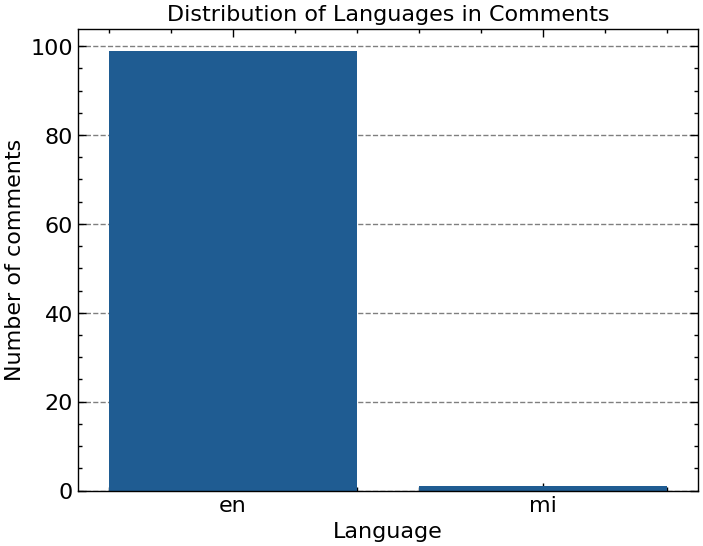

In [ ]:
from googletrans import Translator, LANGUAGES
translator = Translator()

def detect_language2(text):
    try:
        return translator.detect(text).lang
    except Exception as e:
        return "Error"

sample_data = train_data['body'][:100]
sample_data['language'] = sample_data.apply(detect_language2)
print(sample_data['language'].value_counts())


sns.countplot(x=sample_data['language'])
plt.title('Distribution of Languages in Comments')
plt.xlabel('Language')
plt.ylabel('Number of comments')
plt.show()


# EDA Observations
---
* Distribution of the Number of Comments per Author

  - Comments Per Author: A significant variation in the number of comments per author was observed. Some authors are highly active, while others have very few comments. Visualized using histograms and ECDF plots, this distribution highlighted that a small number of authors are responsible for a large portion of comments.
  

* Gender Balance of the train dataset

  - Gender Distribution: The dataset is imbalanced with 3,651 males and 1,349 females. This imbalance suggests that careful consideration is needed when training machine learning models to prevent bias toward the more represented male class.

* Language Diversity in Comments

  - Language Detection:
      Using the googletrans and langdetect library, a sample of comments was analyzed for language diversity.Results from both libraries showed that while the majority of comments are in English, langdetect library found a small proportions in other languages like Swedish, Afrikaans, Tagalog, and Indonesian which makes it unreliable library for detection.

# Feature Extraction

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.1 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions

lemmatizer = WordNetLemmatizer()
stopWords = set(stopwords.words('english'))

def process_text(text):
    text = contractions.fix(text.lower())
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stopWords]
    return " ".join(cleaned_tokens)

train_data['body'] = train_data['body'].apply(process_text)


In [ ]:
subreddits = train_data.subreddit.unique()
subreddits_map = pd.Series(index=subreddits, data=np.arange(subreddits.shape[0]))
subreddits_map

mylittlepony            0
sex                     1
DragonsDogma            2
malefashionadvice       3
todayilearned           4
                     ... 
palegirls            3463
onions               3464
mumfordandsons       3465
infertility          3466
HangoutFest          3467
Length: 3468, dtype: int64

Defining the extract_features function that creates a sparse matrix.
Given an author this matrix will have dimension 1 X 3468,.
where each column is a subreddit and for each subreddit the value of the matrix is 0 if the author has not written in that subreddit and 1 if he has.

In [ ]:
from scipy import sparse
def extract_features(group):
    group_subreddits = group['subreddit']
    group_subreddits = group_subreddits[group_subreddits.isin(subreddits_map.index)].values
    idxs = subreddits_map.loc[group_subreddits].values
    v = sparse.dok_matrix((1, subreddits.shape[0]))
    for idx in idxs:
        if not np.isnan(idx):
            v[0, idx] = 1
    return v.tocsr()

extract_features(train_data[train_data.author=='RedThunder90'])
#As we can see from the output cell, for the author "RedThunder90" we observe how he wrote in only one subreddit

<1x3468 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
#Defining features_dict as a dictionary containing for each author the sparse matrix defined just before:
features_dict = {}

for author, group in train_data.groupby('author'):
    features_dict[author] = extract_features(group)

In [ ]:
#At this point we create the matrix X with a vertical stack of the components of the features_dict dictionary:
X_subreddits  = sparse.vstack([features_dict[author] for author in target.author])
X_subreddits

<5000x3468 sparse matrix of type '<class 'numpy.float64'>'
	with 49152 stored elements in Compressed Sparse Row format>

In [ ]:
y = target.gender
y.head()

0    0
1    1
2    0
3    0
4    0
Name: gender, dtype: int64

In [ ]:
#Defining the extract_text function at which, given an author, puts together all the comments written by that author in a single string.
def extract_text(group):
    group_text = group['body'].values
    return " ".join(group_text)

extract_text(train_data[train_data.author=='RedThunder90'])

'still prefer buy food either grown locally animal treated better definitely looking organic food differently'

In [ ]:
#Creating the text_dict dictionary collecting for each author the result of extract_text function for that author.
text_dict = {}

for author, group in train_data.groupby('author'):
    text_dict[author] = extract_text(group)

In [ ]:
#Creating the author_text, sorted with the order of authors in target:
author_text = [text_dict[author] for author in target.author]
author_text[0][:100]

'still prefer buy food either grown locally animal treated better definitely looking organic food dif'

# From News to Feature Vectors
We need to transform our text data into feature vectors, numerical representations which are suitable for performing statistical analysis. The most common way to do this is to apply a bag-of-words approach where the frequency of an occurrence of a word becomes a feature for our classifier.


## Term Frequency-Inverse Document Frequency

We want to consider the relative importance of particular words, so we'll use term frequency–inverse document frequency as a weighting factor. This will control for the fact that some words are more "spamy" than others.

## Mathematical details

tf–idf is the product of two statistics, term frequency and inverse document
frequency. Various ways for determining the exact values of both statistics
exist. In the case of the '''term frequency''' tf(''t'',''d''), the simplest
choice is to use the ''raw frequency'' of a term in a document, i.e. the
number of times that term ''t'' occurs in document ''d''. If we denote the raw
frequency of ''t'' by f(''t'',''d''), then the simple tf scheme is
tf(''t'',''d'') = f(''t'',''d''). Other possibilities
include:

  * boolean_data_type "frequencies": tf(''t'',''d'') = 1 if ''t'' occurs in ''d'' and 0 otherwise;
  * logarithmically scaled frequency: tf(''t'',''d'') = log (f(''t'',''d'') + 1);
  * augmented frequency, to prevent a bias towards longer documents, e.g. raw frequency divided by the maximum raw frequency of any term in the document: :$\mathrm{tf}(t,d) = 0.5 + \frac{0.5 \times \mathrm{f}(t, d)}{\max\{\mathrm{f}(w, d):w \in d\}}$

The '''inverse document frequency''' is a measure of whether the term is
common or rare across all documents. It is obtained by dividing the total
number of documents by the number of documents containing the
term, and then taking the logarithm of that quotient.

$$\mathrm{idf}(t, D) = \log \frac{|D|}{|\{d \in D: t \in d\}|}$$

with

  * $|D| $: cardinality of D, or the total number of documents in the corpus
  * $|\{d \in D: t \in d\}|$ : number of documents where the term $t$ appears (i.e., $\mathrm{tf}(t,d) eq 0$). If the term is not in the corpus, this will lead to a division-by-zero. It is therefore common to adjust the formula to $1 + |\{d \in D: t \in d\}|$.

Mathematically the base of the log function does not matter and constitutes a
constant multiplicative factor towards the overall result.

Then tf–idf is calculated as

$$\mathrm{tfidf}(t,d,D) = \mathrm{tf}(t,d) \times \mathrm{idf}(t, D)$$

In [ ]:
from sklearn.feature_extraction import text
###############Given approach(by the teacher): ###############
# Transforming the texts into feature vectors by using Term Frequency-Inverse Document Frequency:
#max_df=0.95: In this case, the threshold is set to 0.95, which means that words that appear in more than 95% of the documents will be ignored.
#stop_words='english': Remove stop words from the text. In this case, the stop words are in English.

vectorizer = text.CountVectorizer(max_df=0.95,stop_words='english')
counts = vectorizer.fit_transform(author_text) # Word count matrix
X_body = text.TfidfTransformer().fit_transform(counts)
X_body


<5000x98974 sparse matrix of type '<class 'numpy.float64'>'
	with 1879940 stored elements in Compressed Sparse Row format>

In [ ]:
X_body

<5000x98974 sparse matrix of type '<class 'numpy.float64'>'
	with 1879940 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy.sparse import hstack

# Stack the subreddit features and TF-IDF features, then X contains both subreddit features and TF-IDF features
X = hstack([X_subreddits, X_body])
X

<5000x102442 sparse matrix of type '<class 'numpy.float64'>'
	with 1929092 stored elements in Compressed Sparse Row format>

#Text Vectorization Summary


---


* Grouping Comments by Author:
  - We aggregated all comments per author to consolidate the textual data, ensuring that each author's comments were combined into a single text string.

* Creating Subreddit Features:
  - A sparse matrix was created for subreddit features where each column represented a subreddit. The matrix indicated whether an author had posted in a particular subreddit (binary presence-absence data).

* Vectorization of Text Data:
  We converted the aggregated text data into numerical representations using two main techniques:
  - Bag of Words (BoW): We first transformed the text into a Bag of Words model, which counts the number of times each word appears in a document.
  - TF-IDF Transformation: We then applied TF-IDF weighting to the Bag of Words counts. This method enhances the feature space by reducing the weight of more common words and giving higher importance to words that are more unique to specific documents.

* Combining Feature Sets:
  - The final major step was to horizontally stack the subreddit features (X_subreddits) and the TF-IDF features (X_body) into a single feature matrix (X). This combined feature matrix will be used then for subsequent machine learning tasks.

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

# We Started TruncatedSVD with 1500 components(1000 mentioned at the project was too small to reach the 95% of variance of data.)
svd = TruncatedSVD(n_components=1500)
X_svd = svd.fit_transform(X)
explained_variance_ratio = svd.explained_variance_ratio_.sum()
print('Initial explained variance ratio: ', explained_variance_ratio)

while explained_variance_ratio < 0.95:
    svd.n_components += 200
    X_svd = svd.fit_transform(X)
    explained_variance_ratio = svd.explained_variance_ratio_.sum()

print('Final explained variance ratio: ', explained_variance_ratio)
print('final number of components: : ', svd.n_components)

Initial explained variance ratio:  0.9127077977288829
Final explained variance ratio:  0.9531256434975862
final number of components: :  2300


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2300)
X_svd = svd.fit_transform(X)
explained_variance_ratio = svd.explained_variance_ratio_.sum()
print('Initial explained variance ratio: ', explained_variance_ratio)

Initial explained variance ratio:  0.9531267892446865


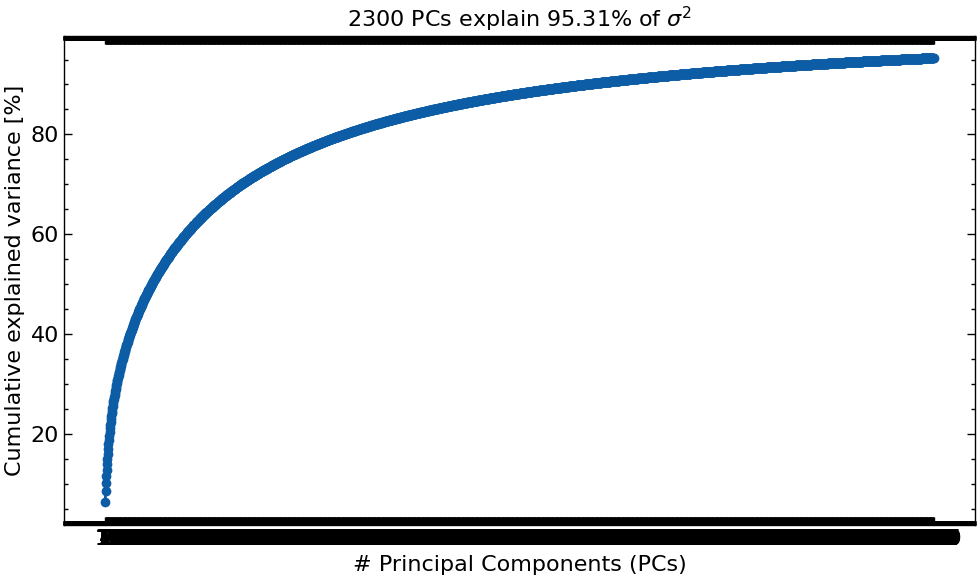

In [ ]:
explained_variance_ratio = svd.explained_variance_ratio_
cumul_exp_var = np.cumsum(explained_variance_ratio)
perc_cumul_exp_var = cumul_exp_var * 100

plt.figure(figsize=(10, 6))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(svd.n_components)], [i for i in range(1,svd.n_components+1)])
plt.grid()
plt.title(f'{svd.n_components} PCs explain {round(perc_cumul_exp_var[-1], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

In [ ]:
len(perc_cumul_exp_var[perc_cumul_exp_var >95])

93

# Secion 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
plt.style.use(['science','grid','notebook'])

def model_selector(classifier_name):
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Multinomial Naive Bayes': MultinomialNB(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'KNN': KNeighborsClassifier()
    }
    return classifiers.get(classifier_name)

def evaluate_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_pred = model.predict(X_test)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else 'N/A',
        'cross_validation_scores': cv_scores,
        'y_pred': y_pred
    }
    print_metrics(metrics, model.__class__.__name__, y_test)
    plot_confusion_matrix(metrics['confusion_matrix'], model.__class__.__name__)

def print_metrics(metrics, model_name, y_test):
    print("----------------------------------------------")
    print(f"Model: {model_name}")
    print(f"Cross-validation scores: {metrics['cross_validation_scores']}")
    print(f"Mean CV accuracy: {np.mean(metrics['cross_validation_scores']):.3f}")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print(f"F1 Score: {metrics['f1']:.3f}")
    print(f"ROC-AUC Score: {metrics['roc_auc']}")
    print("----------------------------------------------")
    print("Classification Report:")
    print(classification_report(y_test, metrics['y_pred']))


def plot_confusion_matrix(cm, model_name=""):
    title = 'Confusion Matrix'
    if model_name:
        title += f' - {model_name}'
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
X_reduced = pd.DataFrame(X_svd)
X

<5000x102442 sparse matrix of type '<class 'numpy.float64'>'
	with 1929092 stored elements in Compressed Sparse Row format>

In [ ]:
# A case study example: Defining model_test function to check the Naive Bayes classifier directly
# Totally, This cell can be neglected, however we will refer to the model_test function in the last part of the supervised section.

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


def model_test(model,X,y) :
    model.fit(X, y)
    print('Accuracy in')
    print(model.score(X,y))
    print('Accuracy out')
    print(cross_val_score(model, X, y, cv=10).mean())
    print('roc auc score:')
    print(roc_auc_score(y, model.predict_proba(X)[:,1]))
    print('roc auc out')
    print(cross_val_score(model, X, y, cv=10, scoring= 'roc_auc').mean())
    return()

model = MultinomialNB()
model_test(model,X,y)
model = LogisticRegression()
model_test(model,X,y)

Accuracy in
0.7932
Accuracy out
0.769
roc auc score:
0.8667097512202044
roc auc out
0.8001797959326307
Accuracy in
0.941
Accuracy out
0.8635999999999999
roc auc score:
0.992547103172887
roc auc out
0.9095231314048815


()

Evaluating Logistic Regression on original dataset:
----------------------------------------------
Model: LogisticRegression
Cross-validation scores: [0.85625 0.8525  0.86625 0.8625  0.87625]
Mean CV accuracy: 0.863
Accuracy: 0.864
Precision: 0.875
Recall: 0.772
F1 Score: 0.804
ROC-AUC Score: 0.9098204185520361
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       728
           1       0.89      0.57      0.70       272

    accuracy                           0.86      1000
   macro avg       0.87      0.77      0.80      1000
weighted avg       0.87      0.86      0.85      1000



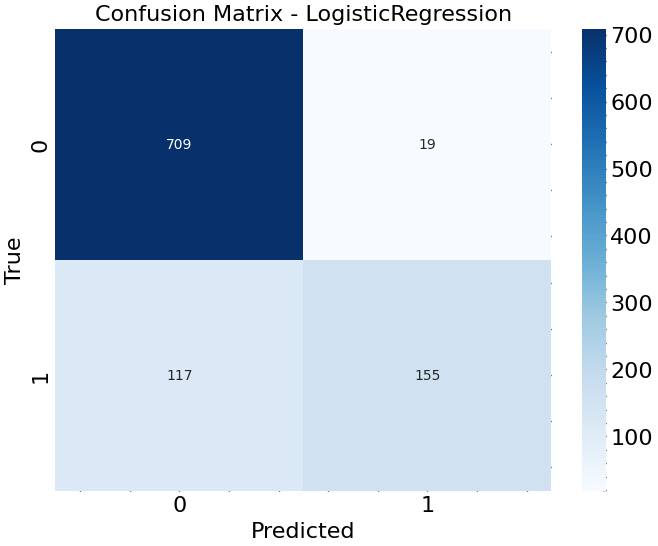

Evaluating Logistic Regression on reduced dataset:
----------------------------------------------
Model: LogisticRegression
Cross-validation scores: [0.85625 0.855   0.86375 0.86375 0.8725 ]
Mean CV accuracy: 0.862
Accuracy: 0.868
Precision: 0.878
Recall: 0.779
F1 Score: 0.811
ROC-AUC Score: 0.91048198125404
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       728
           1       0.89      0.58      0.71       272

    accuracy                           0.87      1000
   macro avg       0.88      0.78      0.81      1000
weighted avg       0.87      0.87      0.86      1000



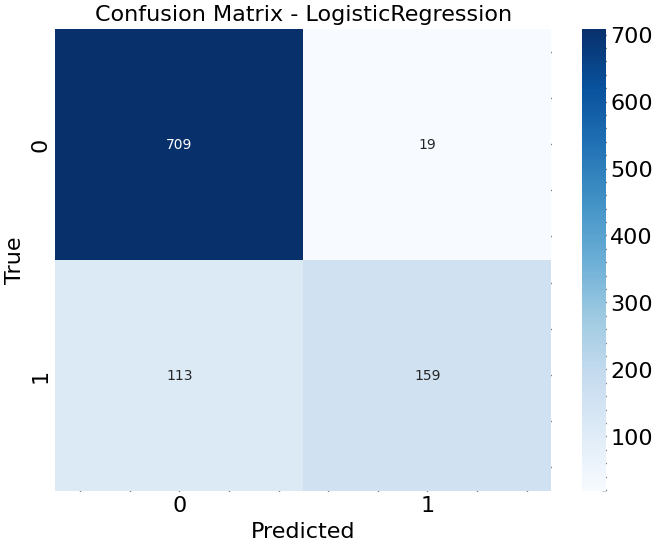

Evaluating Multinomial Naive Bayes on original dataset:
----------------------------------------------
Model: MultinomialNB
Cross-validation scores: [0.76125 0.7625  0.755   0.77375 0.7675 ]
Mean CV accuracy: 0.764
Accuracy: 0.763
Precision: 0.852
Recall: 0.567
F1 Score: 0.549
ROC-AUC Score: 0.811479880413704
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       728
           1       0.95      0.14      0.24       272

    accuracy                           0.76      1000
   macro avg       0.85      0.57      0.55      1000
weighted avg       0.81      0.76      0.69      1000



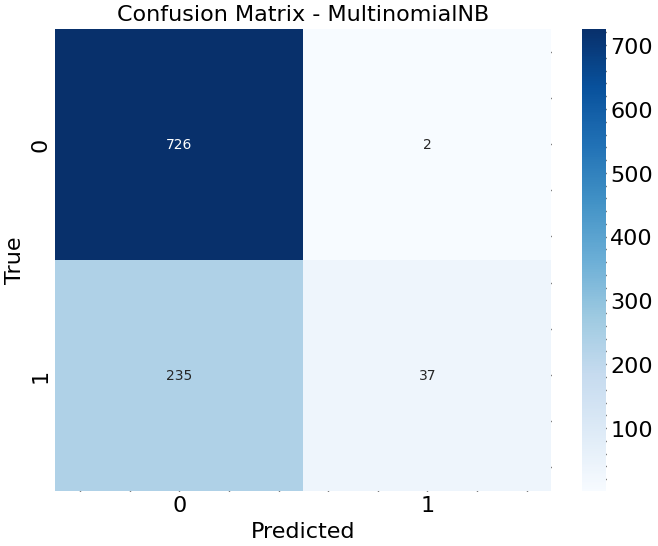

Skipping Multinomial NB for reduced dataset (X_svd):
        This classifier is not suitable for data transformed by SVD,
        since the result may contain negative values.
        
Evaluating Random Forest on original dataset:
----------------------------------------------
Model: RandomForestClassifier
Cross-validation scores: [0.77125 0.755   0.765   0.77    0.77375]
Mean CV accuracy: 0.767
Accuracy: 0.764
Precision: 0.853
Recall: 0.568
F1 Score: 0.552
ROC-AUC Score: 0.8434394190368455
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       728
           1       0.95      0.14      0.24       272

    accuracy                           0.76      1000
   macro avg       0.85      0.57      0.55      1000
weighted avg       0.81      0.76      0.69      1000



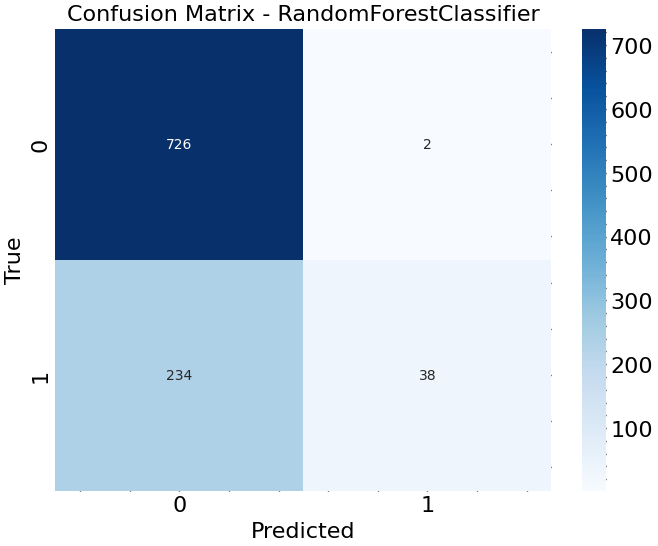

Evaluating Random Forest on reduced dataset:
----------------------------------------------
Model: RandomForestClassifier
Cross-validation scores: [0.7425  0.74    0.74    0.74625 0.7425 ]
Mean CV accuracy: 0.742
Accuracy: 0.749
Precision: 0.850
Recall: 0.540
F1 Score: 0.501
ROC-AUC Score: 0.7392407684227538
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       728
           1       0.96      0.08      0.15       272

    accuracy                           0.75      1000
   macro avg       0.85      0.54      0.50      1000
weighted avg       0.80      0.75      0.66      1000



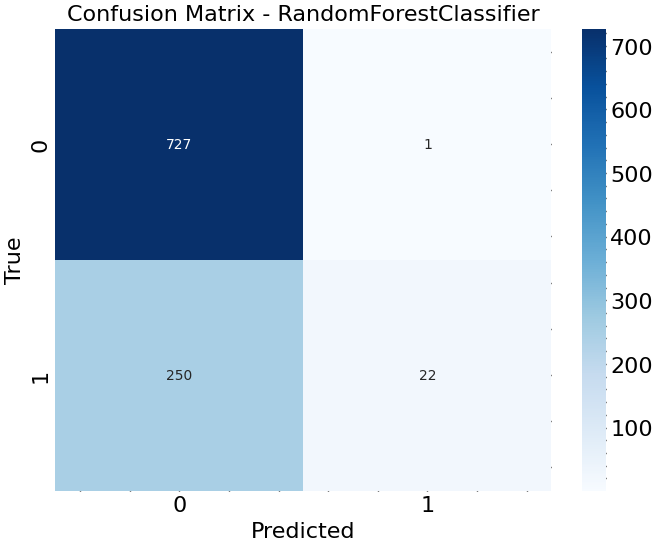

Evaluating KNN on original dataset:
----------------------------------------------
Model: KNeighborsClassifier
Cross-validation scores: [0.75375 0.72    0.74125 0.7625  0.7525 ]
Mean CV accuracy: 0.746
Accuracy: 0.743
Precision: 0.668
Recall: 0.647
F1 Score: 0.655
ROC-AUC Score: 0.705276341305753
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       728
           1       0.53      0.44      0.48       272

    accuracy                           0.74      1000
   macro avg       0.67      0.65      0.66      1000
weighted avg       0.73      0.74      0.73      1000



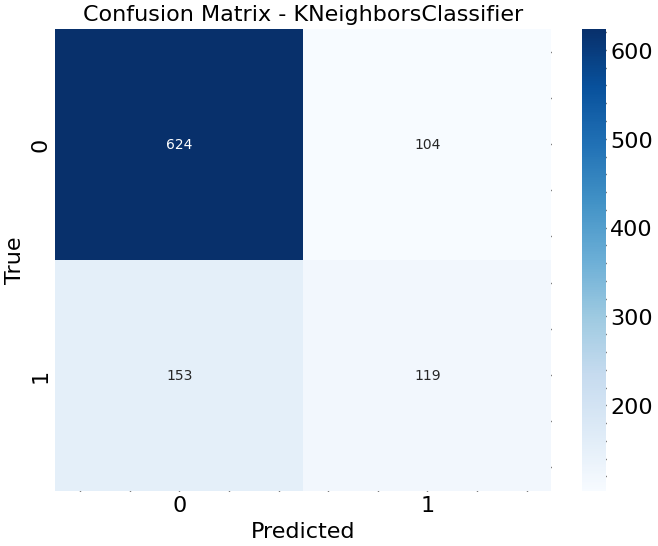

Evaluating KNN on reduced dataset:
----------------------------------------------
Model: KNeighborsClassifier
Cross-validation scores: [0.7325 0.7325 0.7225 0.755  0.76  ]
Mean CV accuracy: 0.740
Accuracy: 0.754
Precision: 0.687
Recall: 0.678
F1 Score: 0.682
ROC-AUC Score: 0.7443413663542341
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       728
           1       0.55      0.51      0.53       272

    accuracy                           0.75      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.75      0.75      0.75      1000



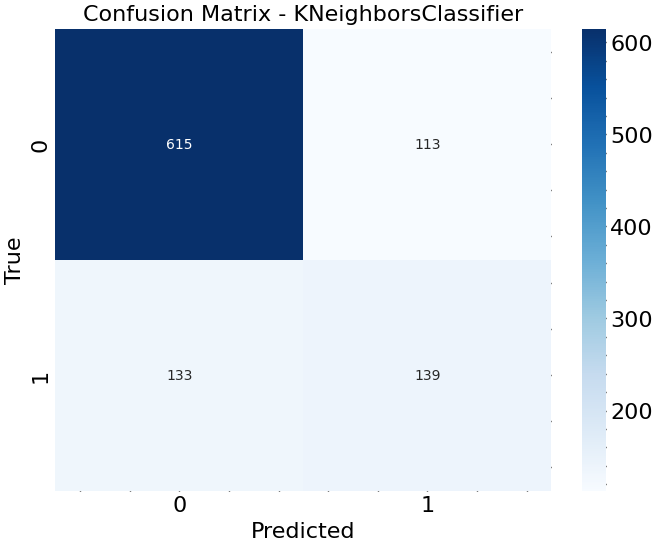

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_svd_train, X_svd_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

models = ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest', 'KNN']

for name in models:
    print(f"Evaluating {name} on original dataset:")
    model = model_selector(name)
    evaluate_metrics(model, X_train, y_train, X_test, y_test)

    if name != 'Multinomial Naive Bayes':
        print(f"Evaluating {name} on reduced dataset:")
        model = model_selector(name)
        evaluate_metrics(model, X_svd_train, y_train, X_svd_test, y_test)
    else:
        print('''Skipping Multinomial NB for reduced dataset (X_svd):
        This classifier is not suitable for data transformed by SVD,
        since the result may contain negative values.
        ''')


Evaluating SVM on original dataset:
----------------------------------------------
Model: SVC
Cross-validation scores: [0.81875 0.81875 0.8275  0.8325  0.84   ]
Mean CV accuracy: 0.828
Accuracy: 0.838
Precision: 0.877
Recall: 0.713
F1 Score: 0.747
ROC-AUC Score: 0.8826508968972205
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       728
           1       0.93      0.44      0.59       272

    accuracy                           0.84      1000
   macro avg       0.88      0.71      0.75      1000
weighted avg       0.85      0.84      0.82      1000



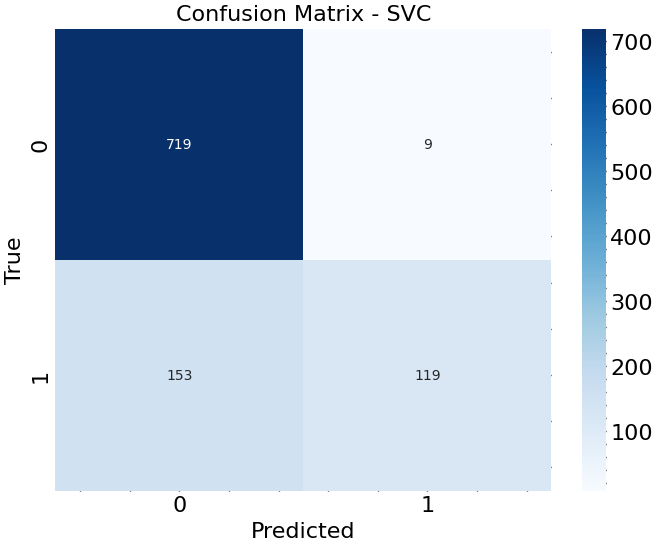

Evaluating SVM on reduced dataset:
----------------------------------------------
Model: SVC
Cross-validation scores: [0.82    0.82    0.82875 0.8325  0.84125]
Mean CV accuracy: 0.829
Accuracy: 0.838
Precision: 0.877
Recall: 0.713
F1 Score: 0.747
ROC-AUC Score: 0.8755302601809954
----------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       728
           1       0.93      0.44      0.59       272

    accuracy                           0.84      1000
   macro avg       0.88      0.71      0.75      1000
weighted avg       0.85      0.84      0.82      1000



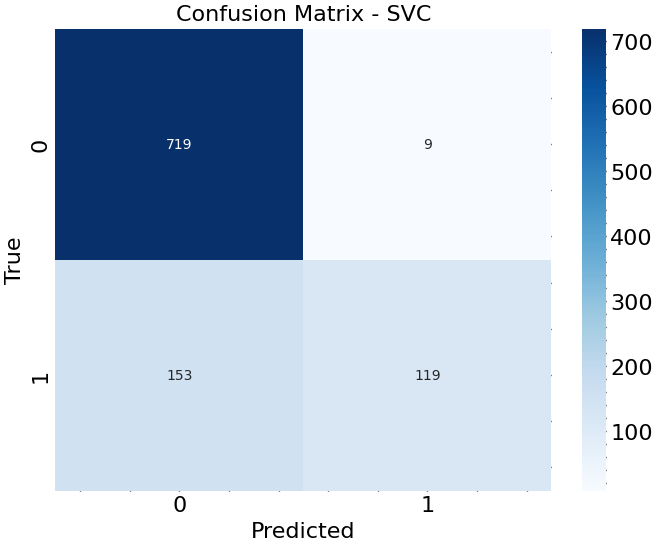

In [ ]:
models = ['SVM']
for name in models:
    print(f"Evaluating {name} on original dataset:")
    model = model_selector(name)
    evaluate_metrics(model, X_train, y_train, X_test, y_test)

    if name != 'Multinomial Naive Bayes':
        print(f"Evaluating {name} on reduced dataset:")
        model = model_selector(name)
        evaluate_metrics(model, X_svd_train, y_train, X_svd_test, y_test)
    else:
        print('''Skipping Multinomial NB for reduced dataset (X_svd):
        This classifier is not suitable for data transformed by SVD,
        since the result may contain negative values.
        ''')



Best parameters found: {'C': 10, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.766
Test set accuracy: 0.759
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       728
           1       0.61      0.31      0.41       272

    accuracy                           0.76      1000
   macro avg       0.70      0.62      0.63      1000
weighted avg       0.74      0.76      0.73      1000



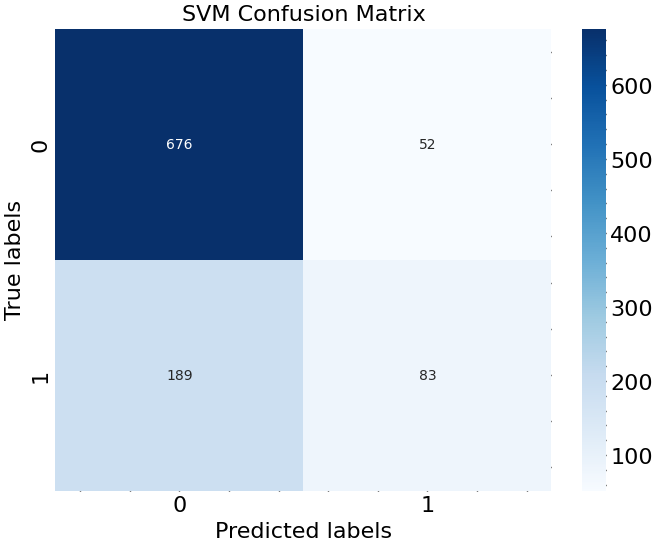

In [ ]:
# Since SVM almost had same performance on the both standard/reduced data, due to the resorce limitation we
# decide to tune its hyperparameters on the reduced data.

from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def SVMClassifier(X_train, y_train, X_test, y_test):
    # Use MaxAbsScaler for scaling sparse data
    scaler = MaxAbsScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},{'kernel': ['linear'], 'C': [1, 10, 100]}]

    clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    print("Best parameters found:", clf.best_params_)
    print("Best cross-validation accuracy: {:.3f}".format(clf.best_score_))

    y_pred = clf.predict(X_test_scaled)
    print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('SVM Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


SVMClassifier(X_svd_train, y_train, X_svd_test, y_test)


In [ ]:
def hyperparameter_tuning(model_name, X_train, y_train, X_test, y_test, hyperparameters):
    model = model_selector(model_name)
    if model is None:
        print(f"Model {model_name} is not defined.")
        return

    param_grid = hyperparameters.get(model_name, {})
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]) if hasattr(best_model, "predict_proba") else 'N/A'
    print_results(model_name, grid_search, y_test, y_pred, roc_auc)
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

def print_results(model_name, grid_search, y_test, y_pred, roc_auc):
    print("----------------------------------------------")
    print("Model:", model_name)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc)
    print()
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Starting hyperparameter tuning for Logistic Regression
----------------------------------------------
Model: Logistic Regression
Best Hyperparameters: {'C': 1}
Accuracy: 0.864
ROC-AUC Score: 0.9098204185520361

Confusion Matrix:
[[709  19]
 [117 155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       728
           1       0.89      0.57      0.70       272

    accuracy                           0.86      1000
   macro avg       0.87      0.77      0.80      1000
weighted avg       0.87      0.86      0.85      1000



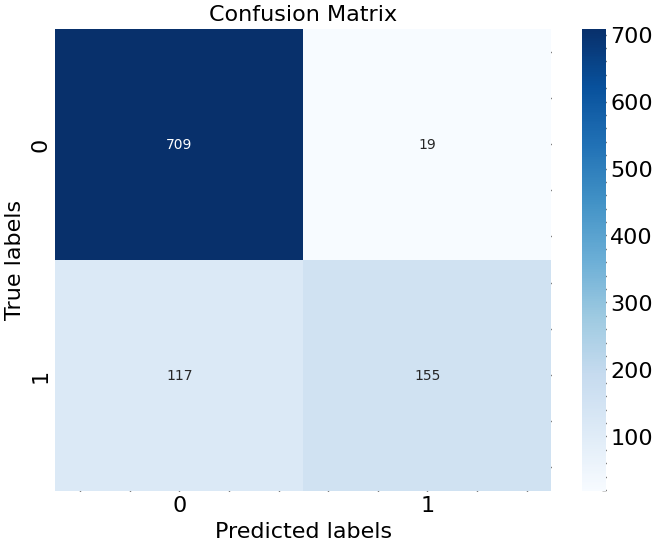

Finished tuning for Logistic Regression

Starting hyperparameter tuning for Multinomial Naive Bayes
----------------------------------------------
Model: Multinomial Naive Bayes
Best Hyperparameters: {'alpha': 0.1}
Accuracy: 0.863
ROC-AUC Score: 0.914825064641241

Confusion Matrix:
[[687  41]
 [ 96 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       728
           1       0.81      0.65      0.72       272

    accuracy                           0.86      1000
   macro avg       0.84      0.80      0.81      1000
weighted avg       0.86      0.86      0.86      1000



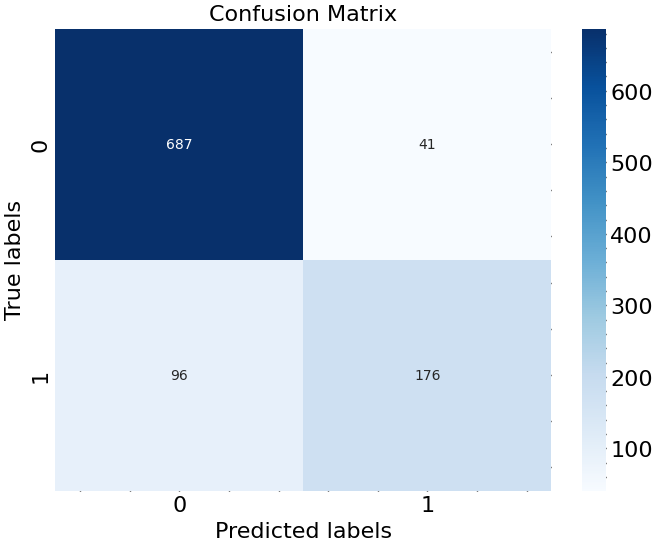

Finished tuning for Multinomial Naive Bayes

Starting hyperparameter tuning for Decision Tree
----------------------------------------------
Model: Decision Tree
Best Hyperparameters: {'max_depth': 10}
Accuracy: 0.781
ROC-AUC Score: 0.6838184793148028

Confusion Matrix:
[[684  44]
 [175  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       728
           1       0.69      0.36      0.47       272

    accuracy                           0.78      1000
   macro avg       0.74      0.65      0.67      1000
weighted avg       0.77      0.78      0.76      1000



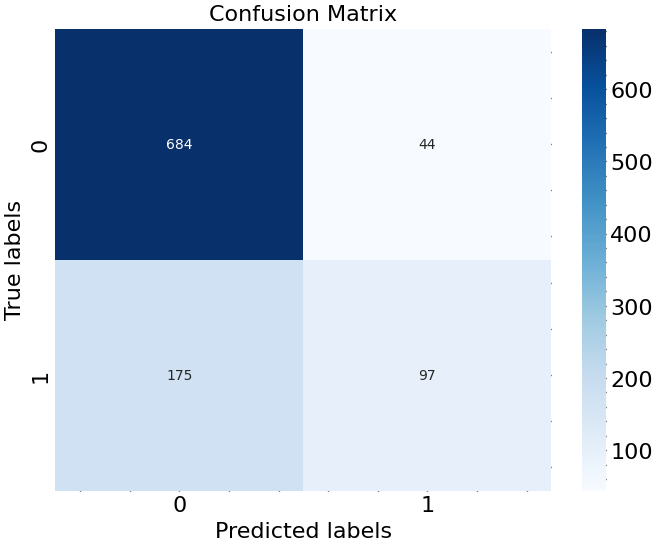

Finished tuning for Decision Tree

Starting hyperparameter tuning for Random Forest
----------------------------------------------
Model: Random Forest
Best Hyperparameters: {'n_estimators': 50}
Accuracy: 0.769
ROC-AUC Score: 0.8395230688429218

Confusion Matrix:
[[727   1]
 [230  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       728
           1       0.98      0.15      0.27       272

    accuracy                           0.77      1000
   macro avg       0.87      0.58      0.56      1000
weighted avg       0.82      0.77      0.70      1000



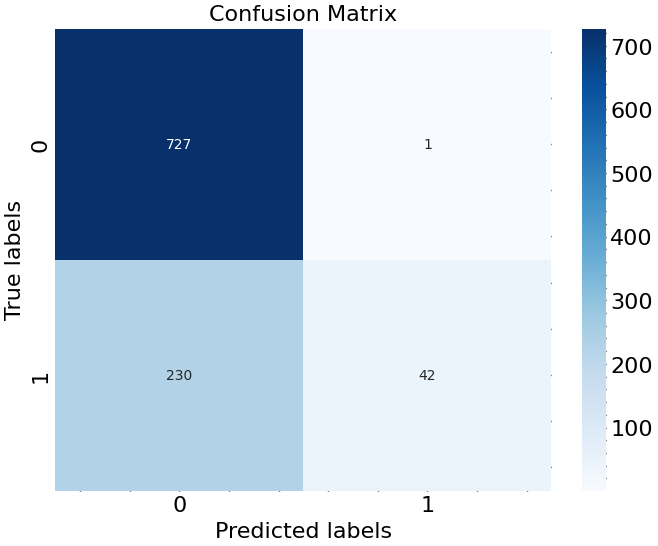

Finished tuning for Random Forest

Starting hyperparameter tuning for KNN
----------------------------------------------
Model: KNN
Best Hyperparameters: {'n_neighbors': 10}
Accuracy: 0.774
ROC-AUC Score: 0.7668243980284422

Confusion Matrix:
[[672  56]
 [170 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       728
           1       0.65      0.38      0.47       272

    accuracy                           0.77      1000
   macro avg       0.72      0.65      0.67      1000
weighted avg       0.76      0.77      0.75      1000



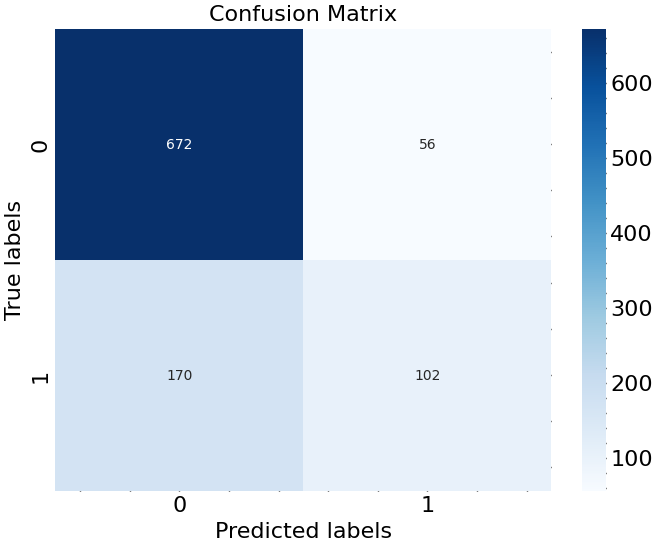

Finished tuning for KNN



In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Multinomial Naive Bayes': {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50]},
    'Random Forest': {'n_estimators': [50, 100, 200, 300]},
    'KNN': {'n_neighbors': [3, 5, 10]},
    #'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'probability': [True]}
}

for model_name in hyperparameters:
    print(f'Starting hyperparameter tuning for {model_name}')
    hyperparameter_tuning(model_name, X_train, y_train, X_test, y_test, hyperparameters)
    print(f'Finished tuning for {model_name}\n')


Starting hyperparameter tuning for SVM
----------------------------------------------
Model: SVM
Best Hyperparameters: {'C': 1, 'kernel': 'linear', 'probability': True}
Accuracy: 0.85
ROC-AUC Score: 0.889746283128636

Confusion Matrix:
[[683  45]
 [105 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       728
           1       0.79      0.61      0.69       272

    accuracy                           0.85      1000
   macro avg       0.83      0.78      0.80      1000
weighted avg       0.85      0.85      0.84      1000



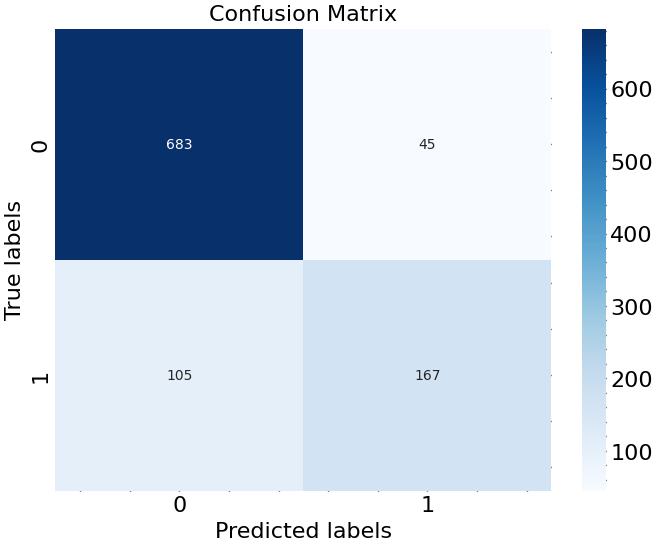

Finished tuning for SVM



In [ ]:
model_name = 'SVM'
hyperparameters = {'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'probability': [True]}}
print(f"Starting hyperparameter tuning for SVM")
hyperparameter_tuning(model_name, X_svd_train, y_train, X_svd_test, y_test, hyperparameters)
print(f"Finished tuning for {model_name}\n")

In [ ]:
# part 2-4 All possible feature combinations
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack, vstack

# Raw text counts
vectorizer = CountVectorizer(max_df=0.95, stop_words='english')
counts = vectorizer.fit_transform(author_text)

# Compare raw counts vs. TF-IDF
X_body_counts = counts
X_body_tfidf = TfidfTransformer().fit_transform(counts)

# Scaling TF-IDF features
scaler = MaxAbsScaler()
X_body_tfidf_scaled = scaler.fit_transform(X_body_tfidf)

# Stacking with subreddit features
X_counts_combined = hstack([X_subreddits, X_body_counts])
X_tfidf_combined = hstack([X_subreddits, X_body_tfidf])
X_tfidf_scaled_combined = hstack([X_subreddits, X_body_tfidf_scaled])

# Evaluating the best model performance on the these new defined feature sets
model = LogisticRegression(C=1)
for features, label in zip([X_counts_combined, X_tfidf_combined, X_tfidf_scaled_combined],
                           ["Counts", "TF-IDF", "TF-IDF Scaled"]):
    scores = cross_val_score(model, features, y, cv=10, scoring='roc_auc')
    print(f"ROC-AUC with {label}: {np.mean(scores):.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ROC-AUC with Counts: 0.856
ROC-AUC with TF-IDF: 0.910
ROC-AUC with TF-IDF Scaled: 0.908


In [ ]:
def feature_test(model,X,y) :
    model.fit(X, y)
    print(cross_val_score(model, X, y, cv=10, scoring= 'roc_auc').mean())

model = LogisticRegression()
feature_test(model, X_body_tfidf_scaled, y)
# By doing some trial, the output of Logistic Regression model for all the possible features is like below:
#[X_subreddits, X_body_counts, X_body_tfidf, X_body_tfidf_scaled]0.8947653564773382,0.8178685833253574,0.8642042462538221,0.8554657254933508


0.8554657254933508


In [ ]:
model = LogisticRegression(C=1)
model_test(model,X_body_counts,y)
#X_subreddits, X_body_counts,X_body_tfidf,X_body_tfidf_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy in
0.9828
Accuracy out


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8034000000000001
roc auc score:
0.9996911799908998
roc auc out


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8178685833253574


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


()

# Observations of Section 2:
---
In Part 5-1, we have set up a general framework that allows for the selection and evaluation of multiple classifier types. The steps we took include:

  * Model Selection: The model_selector function is efficient for fetching different classifier types based on the string class.
  * Metric Evaluation: The evaluate_metrics function comprehensively fits the model, predicts outcomes, and calculates a suite of performance metrics, including cross-validation scores which are critical for assessing model robustness.
  * Results Presentation: Using the print_metrics and plot_confusion_matrix functions, we effectively present detailed results and visualizations for each model's performance.
  * Data Splitting: We are splitting both the original and SVD-reduced datasets and running evaluations on each in order to explain a thorough examination of how dimensionality reduction impacts model performance, which is crucial for understanding the trade-offs associated with such preprocessing steps.

Then In Part 5-2, we executed various classifiers on two versions of our dataset: the original feature matrix and the SVD-reduced feature matrix. Here there is a full description of the results obtained at this part:

  * Logistic Regression:
      * Original Dataset: Achieved a ROC-AUC of 0.910 and an accuracy of 0.864. The model shows good precision and recall balance.
      * Reduced Dataset (SVD): Slightly better ROC-AUC of 0.910, with similar accuracy. This indicates that Logistic Regression maintains its predictive power even with fewer dimensions, suggesting that the most critical features are preserved in the reduction process.

  * Multinomial Naive Bayes:
      * Original Dataset Only: Produced a ROC-AUC of 0.811 with a notably lower accuracy of 0.763. This model shows a significant precision-recall trade-off, particularly struggling with the minority class.
      * Reduced Dataset: Not applicable due to the model's incompatibility with negative values from SVD transformations.

  * Random Forest:
      * Original Dataset: Achieved a ROC-AUC of 0.843 and an accuracy of 0.764. Random Forest shows high precision but low recall for the minority class, indicating it may be overfitting to the majority class or failing to generalize well for the minority class.
      * Reduced Dataset (SVD): Lower ROC-AUC of 0.739 and reduced accuracy of 0.749. The reduction in performance more significantly than Logistic Regression, suggesting that Random Forest may be more sensitive to the loss of certain features through dimensionality reduction.

  * K-Nearest Neighbors (KNN):
      * Original Dataset: Lower ROC-AUC of 0.705 and an accuracy of 0.743. KNN generally has lower performance metrics compared to other models, likely due to its sensitivity to the high-dimensional space and noise in the data.
      * Reduced Dataset (SVD): Slightly improved ROC-AUC of 0.744 and accuracy of 0.754, possibly because the dimensionality reduction helps by mitigating the curse of dimensionality and removing noise.

  * SVM Results:
      * Performance Consistency: The performance of SVM is fairly consistent across both datasets with slight variation in the ROC-AUC score. This indicates that SVM is robust to the dimensionality reduction applied, likely due to its effectiveness in high-dimensional spaces, especially when using kernel methods. Thus due to the computional resource limitaion, we will perform hypertuning over the reduced datasets consisting smaller amount of features.
      * At the begining of hyperparameter tuning section, we start with the SVM to see how scaling the dataset will effect the throughput of this algorithm. Since the datasets are sparse matrices and in order to avoid from densing the dataset by using standardscaler, we use Maxminscaler to preserve the charectristics of the data and as expected SVM has poor performance w.r.t previous part even with applying data scaling over it. Consequencly, our approach on ignoring the applying data scaling algorithm on the sparse datasets seems correct and reasonable.

General Observations and Recommendations:

  * Dimensionality Reduction Impact: Logistic Regression seems least affected by the reduction in feature space, maintaining its performance, which indicates its robustness and effectiveness in handling sparse, high-dimensional data even when reduced. In contrast, models like Random Forest and KNN show varied performance changes, suggesting they might rely more on the nuances in the full dataset that could be lost during reduction.

  * Model Suitability: Logistic Regression stands out as particularly well-suited for this dataset, given its performance consistency across different data representations. It could be considered the best model for further tuning and deployment based on these results.

  * Further Analysis: For models showing a significant drop in performance on the reduced dataset, further investigation into feature importance and selection prior to dimensionality reduction could help in preserving critical information.

Indicators of Overfitting or Underfitting:

  * Overfitting: Typically indicated by a high variance in cross-validation scores or a significant difference between training performance and test performance. In this case, the consistent performance across training (cross-validation) and testing, along with relatively stable cross-validation scores, suggests that overfitting is not a significant concern.
  * Underfitting: This occurs when a model is too simple to capture the underlying pattern. SVM's moderate to high performance metrics suggest it is capturing the underlying patterns adequately. However, the low recall could be a sign that the model is not complex enough or not correctly parameterized to capture all relevant signals, especially for the minority class.

Then at Part 5-3, we performed hyperparameter tuning on the dataset.

1. Logistic Regression

    - Best Hyperparameters: {'C': 1}
    - Accuracy: 0.864
    - ROC-AUC Score: 0.910
    - Observations: This model showed a robust performance with good balance between precision and recall. The high ROC-AUC score indicates strong predictive capabilities. No signs of significant overfitting or underfitting were evident, as the model performed consistently across different metrics.

2. Multinomial Naive Bayes

    - Best Hyperparameters: {'alpha': 0.1}
    - Accuracy: 0.863
    - ROC-AUC Score: 0.915
    - Observations: Achieving a slightly higher ROC-AUC score than Logistic Regression, this model also balanced precision and recall well. The alpha value suggests a slight regularization, which helps in managing overfitting.

3. Decision Tree

    - Best Hyperparameters: {'max_depth': 10}
    - Accuracy: 0.781
    - ROC-AUC Score: 0.684
    - Observations: The decision tree showed signs of underfitting with a restricted max depth, which likely prevented the model from capturing more complex patterns in the data. This is evident from the lower ROC-AUC and accuracy scores compared to other models.

4. Random Forest

    - Best Hyperparameters: {'n_estimators': 50}
    - Accuracy: 0.769
    - ROC-AUC Score: 0.840
    - Observations: Despite a decent ROC-AUC, the low recall for the minority class indicates potential overfitting, where the model performs well on the majority class but fails to generalize effectively across the minority class.

5. KNN

    - Best Hyperparameters: {'n_neighbors': 10}
    - Accuracy: 0.774
    - ROC-AUC Score: 0.767
    - Observations: KNN displayed moderate performance but suffered from lower recall, indicating difficulties in handling class imbalances or capturing more nuanced data relationships.

6. SVM (on reduced dataset)

    - Best Hyperparameters: {'C': 1, 'kernel': 'linear', 'probability': True}
    - Accuracy: 0.85
    - ROC-AUC Score: 0.890
    - Observations: SVM showed good overall performance with balanced precision and recall. The linear kernel worked well, suggesting that the data might be linearly separable to some extent. Tuning on the reduced dataset did not significantly detract from its effectiveness

General Findings

  * Effective Hyperparameter Tuning: Hyperparameter tuning generally enhanced model performances, particularly for Logistic Regression and Naive Bayes, which showed high ROC-AUC scores.
  * Concerns with Overfitting and Underfitting: Overfitting was mainly a concern with the Random Forest model. Underfitting was observed with the Decision Tree due to depth limitations.
  * Balancing Class Performance: Most models need strategies to improve recall, especially for the minority class, without sacrificing precision. Techniques such as SMOTE for oversampling, cost-sensitive learning, or threshold moving in ROC curve analysis could help.
  * Future Focus: Further exploration of feature engineering and potentially combining model predictions (ensemble methods) could yield better overall performance and robustness.

at Part 5-4, we provide insights into the effectiveness of different feature engineering strategies, particularly focusing on how textual features are transformed and combined with subreddit information. Let’s analyze and infer from the outcomes both when stacking (combining) features and when evaluating them individually.

1. Combined Feature Sets (Using hstack):

  - ROC-AUC with Counts: 0.856
  - ROC-AUC with TF-IDF: 0.910
  - ROC-AUC with TF-IDF Scaled: 0.908

* Observations:

    - TF-IDF outperforms Counts: The TF-IDF transformation, which weights terms based on their frequency across documents, provides a more discriminative feature set compared to raw counts. This is evident from the higher ROC-AUC score, suggesting that TF-IDF helps in emphasizing words that are more relevant for classification (by reducing the weight of common words across documents).
    - Scaling has minimal impact: The slight decrease in ROC-AUC when applying MaxAbsScaler to the TF-IDF features suggests that scaling does not significantly alter the predictive power for this model and dataset. It could be that the Logistic Regression model, which inherently handles different feature scales relatively well, doesn't benefit much from this additional scaling step.

2. Individual Feature Sets:

  - ROC-AUC with Subreddits: 0.895
  - ROC-AUC with Body Counts: 0.818
  - ROC-AUC with Body TF-IDF: 0.864
  - ROC-AUC with Body TF-IDF Scaled: 0.855

* Observations:

  - Subreddit features are highly predictive: The subreddit features alone provide a very high ROC-AUC, almost matching the performance of combined TF-IDF features. This suggests that the subreddit context itself is a strong predictor of the target variable, likely capturing significant behavioral patterns.
  - Text features alone are less effective: When evaluated without the context provided by subreddit features, text features (both counts and TF-IDF) perform notably worse. This underscores the importance of context and the additive predictive power when combining text data with categorical data like subreddits.

Inferences and Justifications

  * Feature Synergy: The improvement in ROC-AUC when combining features (especially in the TF-IDF case) indicates that the text features and subreddit features complement each other. While subreddit features capture one aspect of the data, the textual features add another layer of information that enhances model understanding and predictive capability.

  * Importance of Contextual Information: The strong performance of subreddit features alone might indicate that user engagement in specific subreddits is highly indicative of the behaviors or attributes being modeled (e.g., user demographics like gender).

  * Utility of TF-IDF: The TF-IDF transformation's effectiveness highlights its utility in enhancing the meaningfulness of text data for machine learning models by reducing the noise introduced by common but less informative words.

In [ ]:
# Best model evaluation on the determined test dataset
# Could be later completed, if any dataset is available.

# Section 3

In [ ]:
# Load the test data
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_unsupervised.csv')
test_data

,author,subreddit,created_utc,body
0,ejchristian86,TwoXChromosomes,1.388534e+09,I hadn't ever heard of them before joining thi...
1,ZenDragon,gaming,1.388534e+09,"At 7680 by 4320 with 64x AA, right?"
2,savoytruffle,AskReddit,1.388534e+09,bite me
3,hentercenter,stlouisblues,1.388534e+09,Damn that was a good penalty :(
4,rick-o-suave,army,1.388534e+09,I swore into DEP on 6-OCT and I left 5-NOV und...
...,...,...,...,...
1107941,friedeggzohyeah,TrollXChromosomes,1.391213e+09,Oh god I my mom has celiac and has to buy insa...
1107942,im_a_leadfarmer,psychology,1.391213e+09,"Great, I guess i won't skip my 4th one at work..."
1107943,misandrical_unicorn,atheism,1.391213e+09,[k](http://gifrific.com/wp-content/uploads/201...
1107944,LevyWife,AskWomen,1.391213e+09,this is not a yahoo chat room.


In [ ]:
unique_counts = test_data.nunique()
for i in range(len(unique_counts)):
    print(f'Number of unique values in {unique_counts.index[i]} =  {unique_counts.values[i]}')
print(f'Number of total samples of dataset is {len(test_data)}')

Number of unique values in author =  15000
Number of unique values in subreddit =  3970
Number of unique values in created_utc =  715561
Number of unique values in body =  828126
Number of total samples of dataset is 1107946


In [ ]:
missing_data = test_data.isnull().sum()
for i in range(len(unique_counts)):
    print(f'Number of missed values in {missing_data.index[i]} =  {missing_data.values[i]}')


Number of missed values in author =  0
Number of missed values in subreddit =  0
Number of missed values in created_utc =  0
Number of missed values in body =  2


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions
import pandas as pd

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    # Convert non-string data to string and handle None values
    if pd.isnull(text):
        return ""  # return empty string for NaN values
    text = str(text).lower()  # Ensure text is treated as a string
    text = contractions.fix(text)
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(cleaned_tokens)

test_data['body'] = test_data['body'].apply(process_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer(max_df=0.95,stop_words='english')
X_body_counts = vectorizer.fit_transform(test_data['body'])
X_body_tfidf = TfidfTransformer().fit_transform(X_body_counts)
X_body_tfidf

<1107946x179353 sparse matrix of type '<class 'numpy.float64'>'
	with 12166273 stored elements in Compressed Sparse Row format>

In [ ]:
X_body_tfidf

<1107946x179353 sparse matrix of type '<class 'numpy.float64'>'
	with 12166273 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


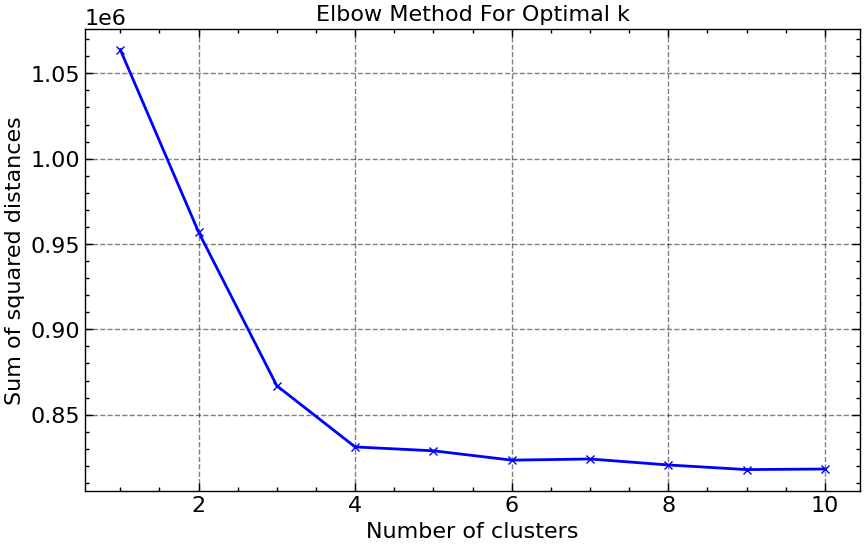

In [ ]:
from sklearn.cluster import KMeans

def calculate_ssd(X, k_range):
    ssd = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        ssd.append(kmeans.inertia_)
    return ssd

k_range = range(1, 11)
ssd = calculate_ssd(X_body_tfidf, k_range)

plt.figure(figsize=(10, 6))
plt.plot(k_range, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k = 4  # assuming k=4 is chosen from the elbow method, however k=3 might be also a good choice
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_body_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(X_body_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Part 3-1: Data Preprocessing for Clustering

* Task:

  - Load the test data.
  - Perform data cleaning and text standardization on the body column.
  - Execute text vectorization using Bag of Words (BoW) and TF-IDF.

We have transformed the text data into a numerical format that is suitable for clustering algorithms by converting the corpus into a TF-IDF weighted sparse matrix. This matrix encodes the importance of words in the comments relative to the entire dataset, which is ideal for detecting patterns and grouping similar comments.

The resulting matrix:

  - Has dimensions indicating that there are 1,107,946 comments.
  - Contains 179,353 unique words after removing stop words and applying max document frequency filtering.
  - Has about 12,166,273 non-zero elements, which suggests the data is quite sparse as expected.

With this step complete, we can trust that the preprocessing pipeline has effectively prepared our data for unsupervised learning tasks. We also performed some extra EDA to extract some useful inforamtion from the dataset, results are clear and concreate.



## K-Means Analysis

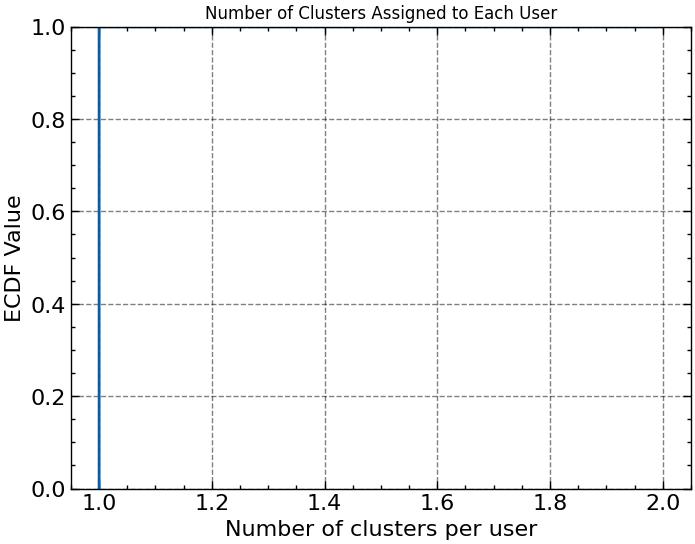

In [ ]:
#Counting clusters per author
clustered_data_kmeans = pd.DataFrame({'author': test_data['author'], 'cluster': kmeans_labels})
clusters_per_author = clustered_data_kmeans.groupby('author')['cluster'].nunique()

sns.ecdfplot(clusters_per_author)
plt.xlabel('Number of clusters per user')
plt.ylabel('ECDF Value')
plt.title('Number of Clusters Assigned to Each User', fontsize=12)
plt.show()


In [ ]:
clusters_per_author.value_counts()

cluster
1    14995
2        5
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


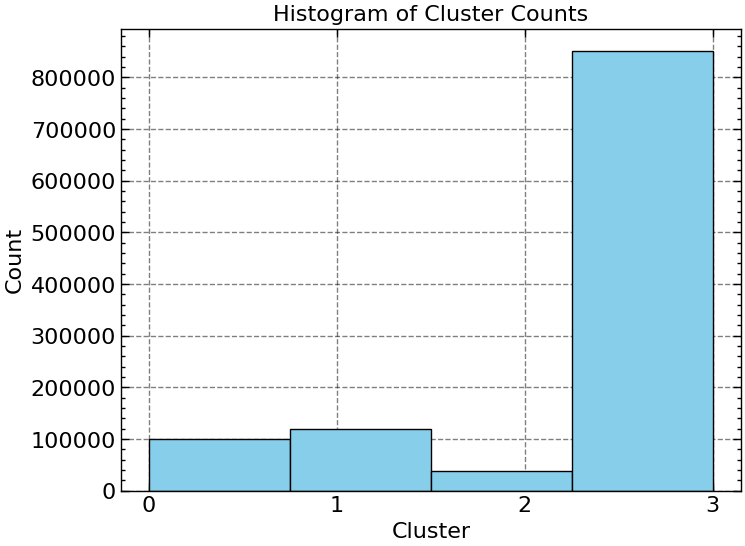

cluster
3    851834
1    118643
0    100227
2     37242
Name: count, dtype: int64


In [ ]:
cluster_counts = clustered_data_kmeans['cluster'].value_counts()
plt.hist(clustered_data_kmeans['cluster'], bins=len(cluster_counts), color='skyblue', edgecolor='black')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Histogram of Cluster Counts')
plt.xticks(cluster_counts.index)
plt.show()

print(cluster_counts)

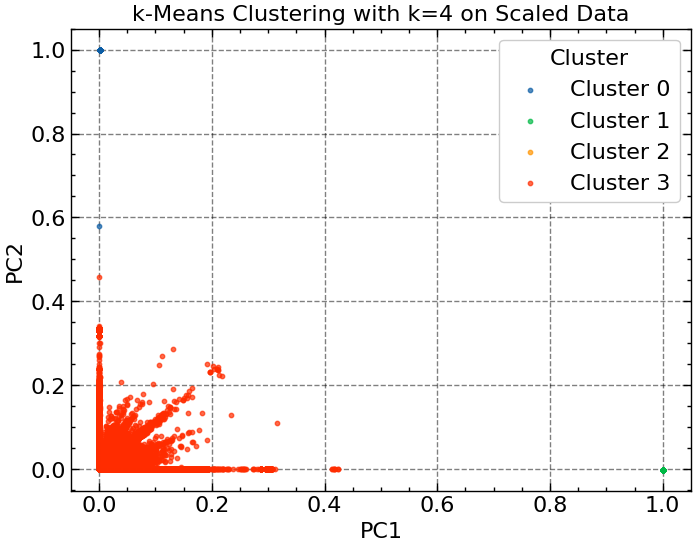

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD

# Scale the data may be also a possible solution, we tested it but the resluts do not change very significantly
#scaler = MaxAbsScaler()
#X_scaled = scaler.fit_transform(X_body_tfidf)

svd = TruncatedSVD(n_components=2, random_state=42)
projection = svd.fit_transform(X_body_tfidf)
projection_df = pd.DataFrame(projection, columns=['PC1', 'PC2'])
projection_df['Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
for i in range(4): # Plotting for k=4
    cluster_data = projection_df[projection_df['Cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {i}', s=10, alpha=0.7)

plt.title('k-Means Clustering with k=4 on Scaled Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
feature_names = vectorizer.get_feature_names_out()

def extract_top_words(X, labels, num_clusters, num_words=10):
    top_words = {}
    for cluster in range(num_clusters):
        indices = np.where(labels == cluster)[0]
        if indices.size > 0:
            cluster_data = X[indices]
            summed_tfidf = np.sum(cluster_data, axis=0)
            if isinstance(summed_tfidf, np.matrix):
                summed_tfidf = np.array(summed_tfidf).flatten()
            top_indices = np.argsort(summed_tfidf)[-num_words:]
            top_features = [(feature_names[i], summed_tfidf[i]) for i in reversed(top_indices)]
            top_words[cluster] = top_features
        else:
            top_words[cluster] = []

    return top_words

k = 4
top_words_per_cluster = extract_top_words(X_body_tfidf, kmeans_labels, k)
for cluster, words in top_words_per_cluster.items():
    print(f'Cluster {cluster} top words:')
    for word, score in words:
        print(f'{word}: {score}')
    print()


Cluster 0 top words:
bridesmaid: 34010.4871558859
smoothly: 34002.50480821532
lo: 34001.52137038842
fairly: 33744.85380010924
certainly: 33644.61881292434
glad: 33621.78058216417
went: 33019.77446112449
old: 32849.79462805808
day: 31715.39211050673
gazan: 0.0

Cluster 1 top words:
expected: 36360.330890799254
dollar: 36329.8888618669
fix: 36280.3271394992
ready: 36268.87769762303
event: 36265.90088258924
lost: 36073.34015949899
happened: 35946.67594931406
hour: 35723.03288390035
trying: 35236.43862535388
man: 35055.67558074195

Cluster 2 top words:
yank: 37241.89837444261
going: 0.4392304188703921
ﾟдﾟщ: 0.0
gazebo: 0.0
gazidis: 0.0
gazi: 0.0
gazette: 0.0
gazer: 0.0
gazelle: 0.0
gazela: 0.0

Cluster 3 top words:
like: 15655.899010599367
http: 14338.546410793386
think: 9964.558472677134
know: 9725.258743926175
people: 9638.029228747579
good: 8805.10133598556
really: 8740.163381975533
time: 8578.805713020021
make: 7694.824549597467
thing: 7528.047985118332



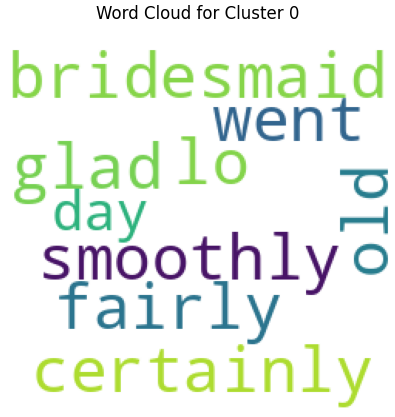

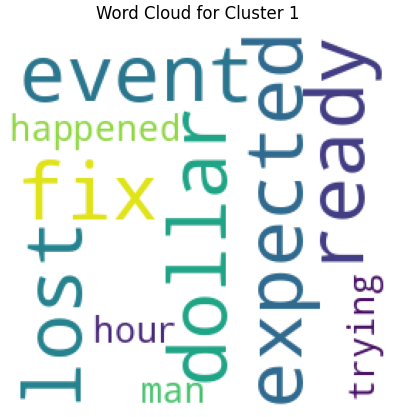

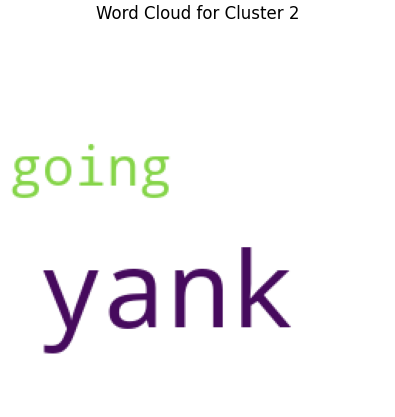

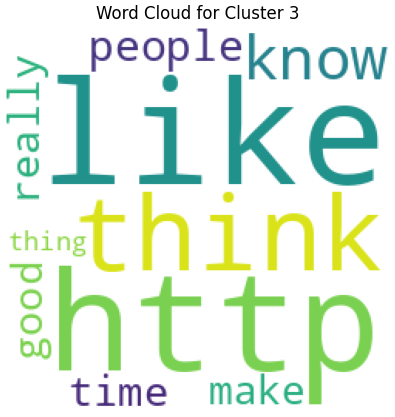

In [ ]:
from wordcloud import WordCloud

def generate_word_cloud(top_words, cluster_num):
    word_freqs = {word: score for word, score in top_words}
    wordcloud = WordCloud(width=250, height=250, background_color='white').generate_from_frequencies(word_freqs)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}',fontsize = 12)
    plt.show()
    print()

# top_words_per_cluster is a dictionary where keys are cluster numbers
# and values are lists of tuples(word, score)
for cluster_num, words in top_words_per_cluster.items():
    generate_word_cloud(words, cluster_num)


In [ ]:
print(test_data['subreddit'].value_counts())
test_data['cluster'] = kmeans_labels
cluster_subreddit_distribution = pd.crosstab(test_data['subreddit'], test_data['cluster'])
print(cluster_subreddit_distribution)
#cluster_subreddit_distribution

subreddit
AskReddit         135811
projectcar        118677
beyondthebump     100626
AskMen             26088
AskWomen           22691
                   ...  
HiTMAN                 1
CompetitiveEDH         1
lifepluswomen          1
beercirclejerk         1
acecombat              1
Name: count, Length: 3970, dtype: int64
cluster       0  1  2    3
subreddit                 
1022          0  0  0   24
1200isplenty  0  0  0   25
1911          0  0  0   17
195           0  0  0   21
2007scape     0  0  0  102
...          .. .. ..  ...
yugioh        0  0  0  142
zelda         0  0  0  195
zen           0  0  0   26
zombies       0  0  0   27
zyzz          0  0  0   20

[3970 rows x 4 columns]


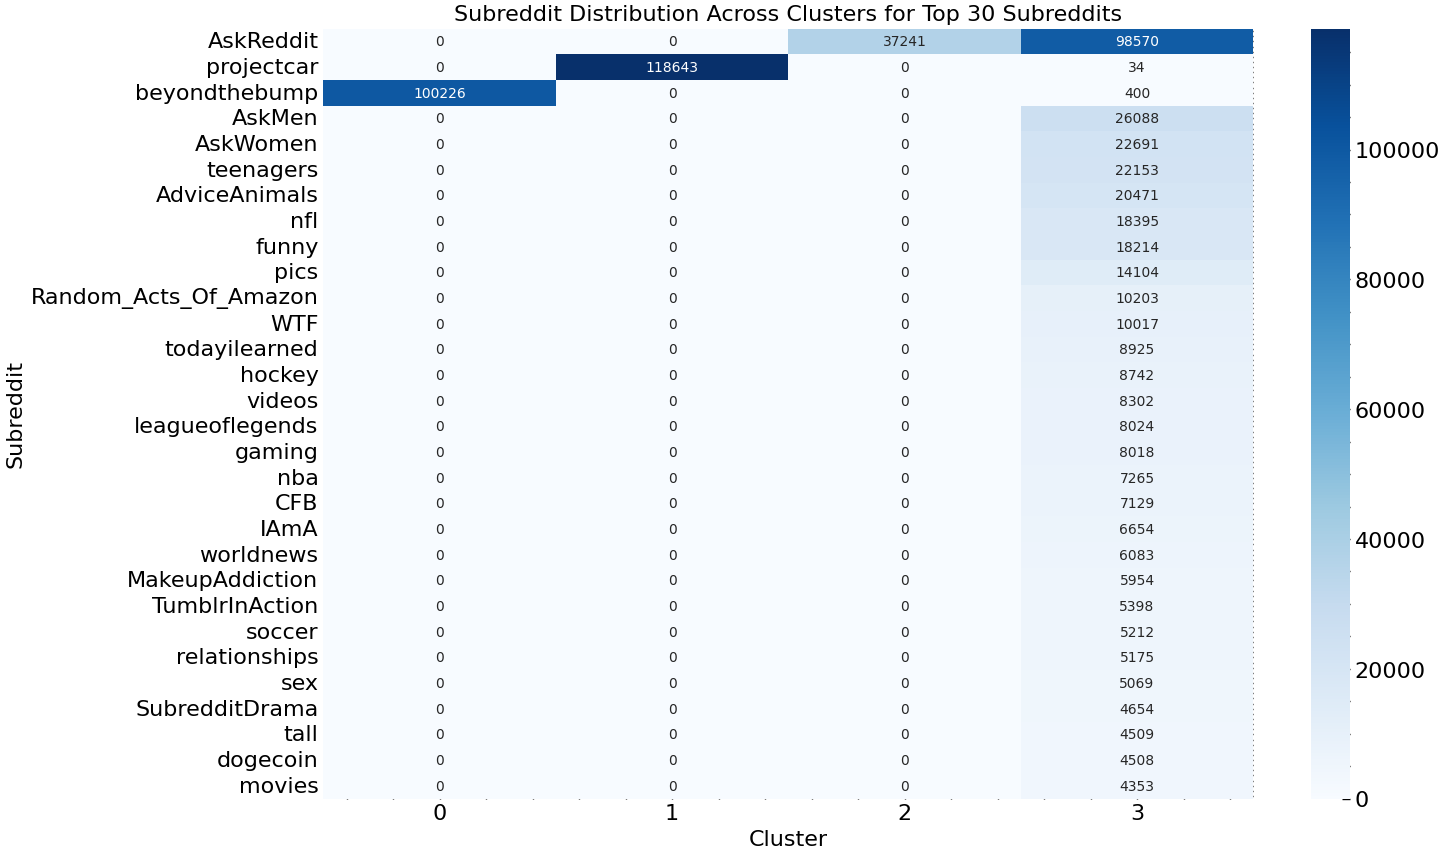

In [ ]:
#Given the large number of subreddits(3970),We Select the top 30 subreddits for visualization to avoid cluttering
top_subreddits = cluster_subreddit_distribution.sum(axis=1).nlargest(30).index
filtered_distribution = cluster_subreddit_distribution.loc[top_subreddits]
plt.figure(figsize=(15,10))
sns.heatmap(filtered_distribution, annot=True, fmt="d", cmap='Blues')

plt.title('Subreddit Distribution Across Clusters for Top 30 Subreddits')
plt.xlabel('Cluster')
plt.ylabel('Subreddit')
plt.show()


Optimal Number of Clusters
* First, from the elbow method we found out that the elbow point seems to occur at k=4, suggesting that increasing the number of clusters beyond 4 yields diminishing returns in terms of within-cluster variance reduction.

Cluster Assignments to Users
* The ECDF plot and cluster count histogram suggest that the majority of users are concentrated in one cluster, Cluster 3. This might indicate that Cluster 3 captures a common theme or type of language prevalent across a broad range of comments. However, the other three clusters might represent more specialized or distinct types of comments given their smaller sizes.

Principal Component Analysis (PCA) Visualization

* The PCA scatter plot shows how the comments are distributed across the first two principal components after reducing the dimensionality of the TF-IDF features. This visualization can provide insights into the separability of clusters in a lower-dimensional space. From the plot, it seems like most data points are concentrated in a particular area of the graph, possibly indicating that the clusters are not very well separated in the first two principal components.

Cluster Characterization

* The list of top words in each cluster gives us a snapshot of the most significant words contributing to the TF-IDF vectors within each cluster. The presence of words like "bridesmaid," "smoothly," "dollar," and "expected" suggests thematic distinctions between the clusters, though there are also nonsensical entries like "ﾟдﾟщ" and "gazan: 0.0," which might be noise, outliers, or artifacts from the clustering process.

Word Cloud Visualization

* The word clouds would visualize the frequency and importance of the words in each cluster, providing a more intuitive understanding of the topics or themes within each cluster. Ideally, each word cloud should be visually distinct from the others, emphasizing the differences in word usage across clusters.

Inferences and Recommendations

  * Thematic Trends: Clusters appear to reflect certain thematic trends, with Cluster 0 having words related to perhaps personal experiences or events, Cluster 1 having words that may relate to financial discussions, and Cluster 3 containing more general discussion words like "like," "think," and "know."
  * Cluster Purity: The mixed nature of the top words, especially in Clusters 2 and 3, may suggest that the clusters are not entirely pure or that the method for identifying top words needs refinement.
  * Next Steps: It might be beneficial to investigate the context in which these top words are used to better understand the thematic elements of each cluster. Additionally, experimenting with different numbers of clusters, preprocessing methods, or clustering algorithms could yield more distinct groupings.

It's also important to note that the choice of number of words to examine (e.g., top 10) can influence the perceived themes of the clusters. Looking at a broader range of words or employing techniques to identify contextually significant terms could provide a more nuanced understanding.

Finally from the heatmap and the crosstabulation output provided for Part 6-4, several inferences can be made regarding the subreddit distribution across the clusters:

Subreddit Clustering Insights:

  * Dominant Clusters: The heatmap suggests there are clusters that have a significant concentration of comments from specific subreddits. For example, "AskReddit" seems to dominate one cluster, which could indicate a general discussion cluster where a variety of topics are covered.

  * Cluster-Subreddit Alignment: It appears that certain subreddits are almost exclusively found in particular clusters. This could be an indication that the clustering algorithm is effectively grouping comments based on subreddit-specific language or topics.

  * Sparse Clusters: Some clusters may have a very sparse representation across subreddits, which might suggest that these clusters are picking up on less common language usage or more unique discussion threads.

  * Top Subreddit Distribution: The top subreddits based on comment count show a skewed distribution across the clusters. This might reflect the varying popularity and activity levels of different subreddits, with more active ones contributing more comments to the clusters.

  * Inter-cluster Subreddit Distribution: While some subreddits like "AskReddit" seem to be isolated to a single cluster, others are spread across multiple clusters. This can indicate that the language or topics in these subreddits are more varied and do not correspond to a single thematic cluster.

  * Subreddit Diversity within Clusters: A healthy diversity of subreddits within a cluster may suggest that the cluster captures a broad range of discussions that share underlying similarities in language or sentiment.

  * Potential Bias and Overlap: The method of clustering and the subsequent assignment of subreddits to clusters can sometimes be influenced by the overall size and activity of the subreddit. Larger subreddits could overshadow smaller ones, and similarly themed subreddits might end up in the same cluster due to shared vocabulary, even if their topics are different.


## Minibatch Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


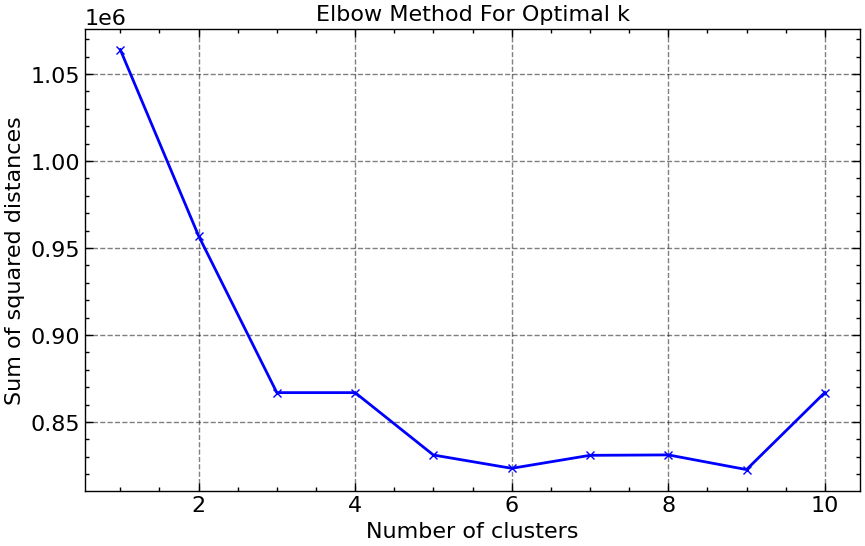

In [ ]:
def calculate_ssd(X, k_range):
    ssd = []
    for k in k_range:
        miniBatchKMeans = MiniBatchKMeans(n_clusters=k, random_state=42)
        miniBatchKMeans.fit(X)
        ssd.append(miniBatchKMeans.inertia_)
    return ssd

k_range = range(1, 11)
ssd = calculate_ssd(X_body_tfidf, k_range)
plt.figure(figsize=(10, 6))
plt.plot(k_range, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
from sklearn.cluster import MiniBatchKMeans
k = 3
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(X_body_tfidf)
minibatch_kmeans_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Number of Clusters Assigned to Each User')

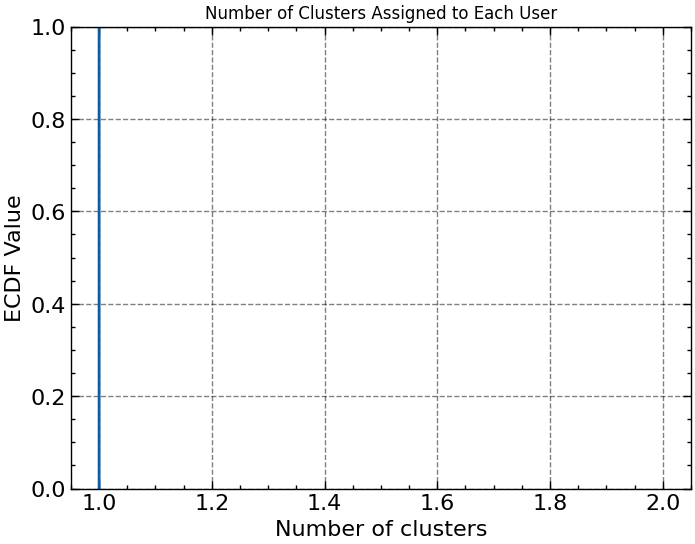

In [ ]:
## Count clusters per author
clustered_data_MiniBatch = pd.DataFrame({'author': test_data['author'], 'cluster': minibatch_kmeans_labels})
clusters_per_author = clustered_data_MiniBatch.groupby('author')['cluster'].nunique()

sns.ecdfplot(clusters_per_author)
plt.xlabel('Number of clusters')
plt.ylabel('ECDF Value')
plt.title('Number of Clusters Assigned to Each User', fontsize=12)


In [ ]:
clusters_per_author.value_counts()

cluster
1    14997
2        3
Name: count, dtype: int64

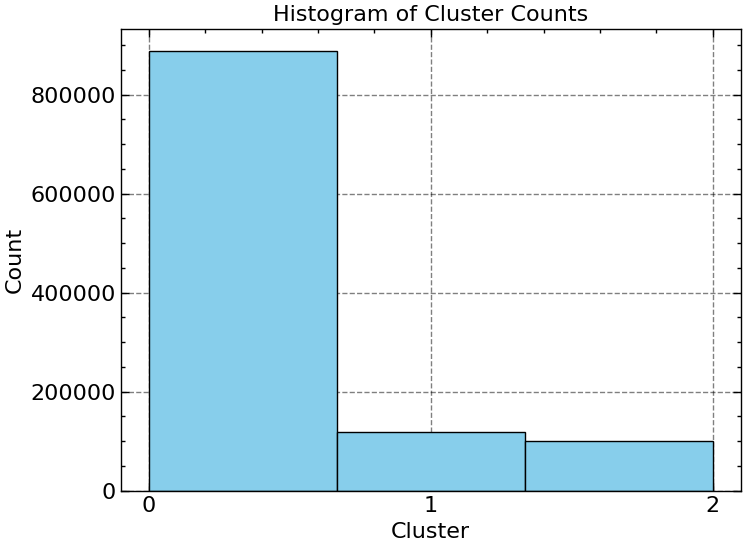

cluster
0    889076
1    118643
2    100227
Name: count, dtype: int64


In [ ]:
cluster_counts = clustered_data_MiniBatch['cluster'].value_counts()
plt.hist(clustered_data_MiniBatch['cluster'], bins=len(cluster_counts),color='skyblue', edgecolor='black')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(cluster_counts.index)
plt.show()
print(cluster_counts)

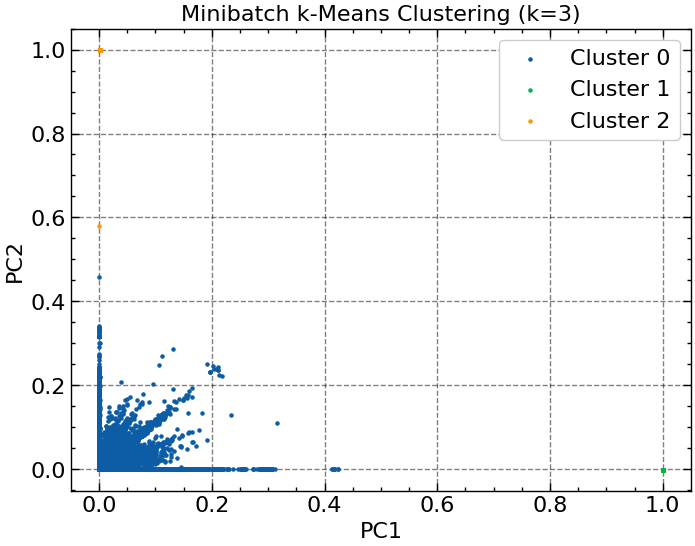

In [ ]:
svd = TruncatedSVD(n_components=2, random_state=42)
projection = svd.fit_transform(X_body_tfidf)
projection_df = pd.DataFrame(projection, columns=['PC1', 'PC2'])
projection_df['Cluster'] = minibatch_kmeans_labels
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(minibatch_kmeans_labels):
    sub_df = projection_df[projection_df['Cluster'] == cluster_id]
    plt.scatter(sub_df['PC1'], sub_df['PC2'], label=f'Cluster {cluster_id}', s=5)

plt.title('Minibatch k-Means Clustering (k=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
feature_names = vectorizer.get_feature_names_out()

k = 3
top_words_per_cluster = extract_top_words(X_body_tfidf, minibatch_kmeans_labels, k)
for cluster, words in top_words_per_cluster.items():
    print(f'Cluster {cluster} top words:')
    for word, score in words:
        print(f'{word}: {score}')
    print()


Cluster 0 top words:
yank: 37255.79267283046
like: 15655.899010599367
http: 14338.546410793386
think: 9964.558472677134
know: 9725.258743926175
people: 9638.029228747579
good: 8805.10133598556
really: 8740.163381975533
time: 8578.805713020021
make: 7694.824549597467

Cluster 1 top words:
expected: 36360.330890799254
dollar: 36329.8888618669
fix: 36280.3271394992
ready: 36268.87769762303
event: 36265.90088258924
lost: 36073.34015949899
happened: 35946.67594931406
hour: 35723.03288390035
trying: 35236.43862535388
man: 35055.67558074195

Cluster 2 top words:
bridesmaid: 34010.4871558859
smoothly: 34002.50480821532
lo: 34001.52137038842
fairly: 33744.85380010924
certainly: 33644.61881292434
glad: 33621.78058216417
went: 33019.77446112449
old: 32849.79462805808
day: 31715.39211050673
gazan: 0.0



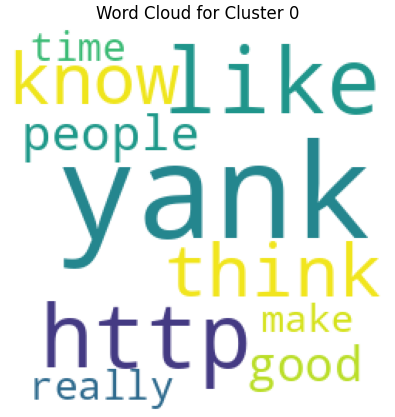

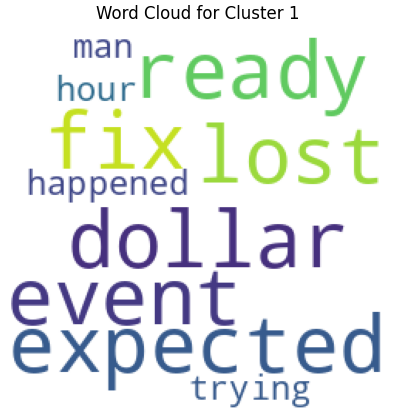

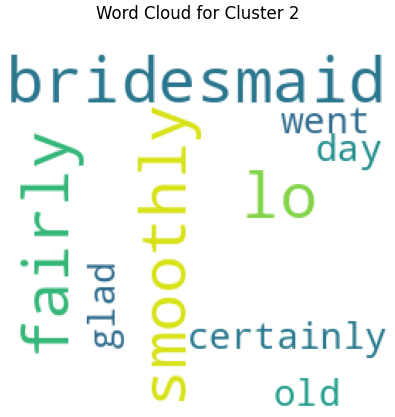

In [ ]:
from wordcloud import WordCloud

for cluster_num, words in top_words_per_cluster.items():
    generate_word_cloud(words, cluster_num)


In [ ]:
print(test_data['subreddit'].value_counts())
test_data['cluster'] = minibatch_kmeans_labels
cluster_subreddit_distribution = pd.crosstab(test_data['subreddit'], test_data['cluster'])
print(cluster_subreddit_distribution)
#cluster_subreddit_distribution

subreddit
AskReddit         135811
projectcar        118677
beyondthebump     100626
AskMen             26088
AskWomen           22691
                   ...  
HiTMAN                 1
CompetitiveEDH         1
lifepluswomen          1
beercirclejerk         1
acecombat              1
Name: count, Length: 3970, dtype: int64
cluster         0  1  2
subreddit              
1022           24  0  0
1200isplenty   25  0  0
1911           17  0  0
195            21  0  0
2007scape     102  0  0
...           ... .. ..
yugioh        142  0  0
zelda         195  0  0
zen            26  0  0
zombies        27  0  0
zyzz           20  0  0

[3970 rows x 3 columns]


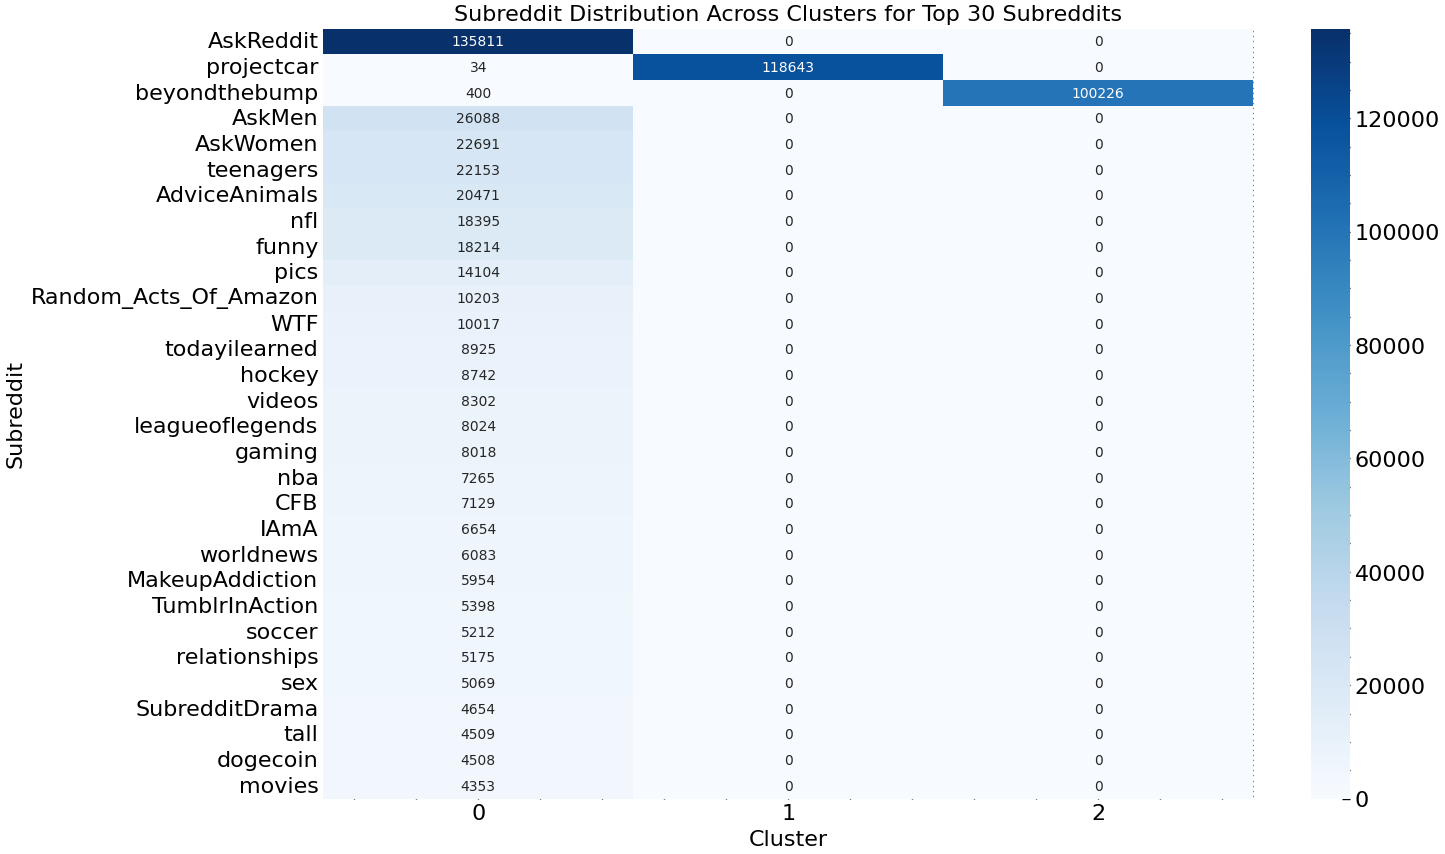

In [ ]:
#Again, We select the top 30 subreddits for visualization
top_subreddits = cluster_subreddit_distribution.sum(axis=1).nlargest(30).index
filtered_distribution = cluster_subreddit_distribution.loc[top_subreddits]

plt.figure(figsize=(15,10))
sns.heatmap(filtered_distribution, annot=True, fmt="d", cmap='Blues')
plt.title('Subreddit Distribution Across Clusters for Top 30 Subreddits')
plt.xlabel('Cluster')
plt.ylabel('Subreddit')
plt.show()


Minibatch k-means results seem to have a different distribution in the clusters compared to the standard k-means. While k-means resulted in a fairly large cluster 3, minibatch k-means appears to have a more balanced distribution among clusters 0, 1, and 2.

The word clouds and top words per cluster should ideally give insights into the thematic contents of each cluster. From our results, it seems that:

  * Cluster 0 for minibatch k-means has words associated with general discussion ('like', 'think', 'know'), which might be indicative of clusters capturing conversational or common discourse.
  * Cluster 1 for minibatch k-means seems to have words like 'expected', 'dollar', 'fix', which might suggest discussions around finance, expectations, or problem-solving.
  * Cluster 2 for minibatch k-means contains words like 'bridesmaid', 'smoothly', 'fairly', hinting at discussions about events, possibly weddings, and related activities.

The heatmap visualization should provide a look at how subreddits are distributed among the clusters. A cluster dominated by a single subreddit could be indicative of a 'pure' cluster, where discussions from that subreddit are distinct enough to be grouped separately. In contrast, a more spread out distribution would suggest that the clustering isn't aligning with subreddit divisions as clearly.

Comparing k-means to minibatch k-means:

  * Minibatch k-means tends to be faster and more scalable to large datasets due to the incremental update to cluster centers.
  * The resulting clusters from minibatch k-means can sometimes be less consistent due to the randomness introduced by the minibatches. This can be a disadvantage if the dataset has a complex or subtle cluster structure.
  * The final cluster quality from minibatch k-means might slightly differ from standard k-means, as seen in our results. Differences in cluster size and composition can emerge due to the different approaches to convergence.

Both algorithms have their use-cases and can be selected based on the specific needs of our dataset and computational resources. If we're dealing with very large datasets and need a quicker, more scalable solution, minibatch might be preferable. However, if we're looking for more precise cluster assignments and have the computational resources to handle it, standard k-means might be the better choice.

# REST (Unsuccessful trials over other unsupervised algorithms)

In [ ]:
X_sparse = X_body_tfidf

# Subsampling the data
subsample_size2 = int(0.01 * X_sparse.shape[0]) # 1% of the dataset
indices2 = np.random.choice(X_sparse.shape[0], subsample_size2, replace=False)
X_subsample2 = X_sparse[indices2]
X_subsample2

<11079x179353 sparse matrix of type '<class 'numpy.float64'>'
	with 122764 stored elements in Compressed Sparse Row format>

In [ ]:
np.sqrt(X_subsample2.shape[0])

105.256828757093

In [ ]:
from sklearn.cluster import DBSCAN
import seaborn as sns

# DBSCAN

dbscan = DBSCAN()
cl_labels3 = dbscan.fit_predict(X_subsample2) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X_subsample2, cl_labels3)
(unique, counts)=np.unique( cl_labels3, return_counts=True)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')

# Now analyze the performance varying epsilon and min_samples.

shs = []
for eps in np.arange(0.5, 2, 0.5):
    eps = round(eps,3)
    for mins in range(2, int(np.sqrt(X_subsample2.shape[0])),10):
        dbscan = DBSCAN(eps=eps, min_samples=mins)
        cl_labels3 = dbscan.fit_predict(X_subsample)
        try:
            silhouette  = silhouette_score(X_subsample, cl_labels3)
        except:
            silhouette = np.nan
        shs.append((eps, mins, silhouette))

gs = pd.DataFrame(shs, columns=['eps', 'minPts', 'sh'])
gs = pd.pivot_table(gs, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)
# Plot the silhouette score for the different values with a heatmap

plt.figure(figsize=(12,3))
max_ss = gs.max().max()
mins_max_ss = gs.stack().idxmax()[0]
eps_max_ss = gs.stack().idxmax()[1]
plt.title(f'The maximum silhouette score is {max_ss} with min_samples of {mins_max_ss} and epsilon of {eps_max_ss}')
sns.heatmap(gs, cmap='Blues', cbar_kws={'label':'Silhouette score'}, linewidths=.005)
plt.gca().invert_yaxis()
plt.show()



Number of clusters (including noise):  14
Size of each cluster:  [8202 1015  223 1188  376    7   12    7    5   13    5   13    7    6]
Silhouette: 0.04


KeyboardInterrupt: 

In [ ]:
from scipy.sparse import csr_matrix

svd = TruncatedSVD(n_components=100)
mydataframe = csr_matrix(X_body_tfidf)
svd.fit(mydataframe)

explained_variance = svd.explained_variance_ratio_
cumul_exp_var = np.cumsum(explained_variance)
perc_cumul_exp_var = cumul_exp_var*100
plt.figure(figsize=(10, 6))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.grid()
plt.tight_layout()
plt.show()

print(perc_cumul_exp_var)


NameError: name 'plt' is not defined

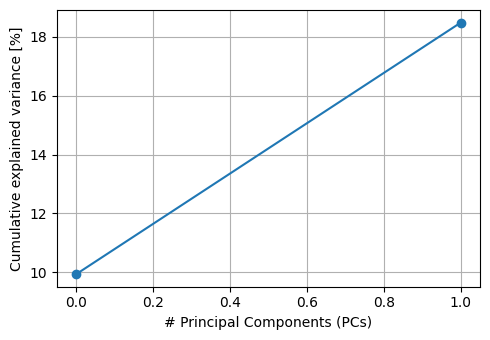

array([ 9.928489  , 18.48994894])

In [ ]:
svd = TruncatedSVD(random_state=15)

svd.fit(mydataframe)
explained_variance = svd.explained_variance_ratio_
cumul_exp_var = np.cumsum(explained_variance)
perc_cumul_exp_var = cumul_exp_var*100

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.grid()
plt.tight_layout()
plt.show()
perc_cumul_exp_var

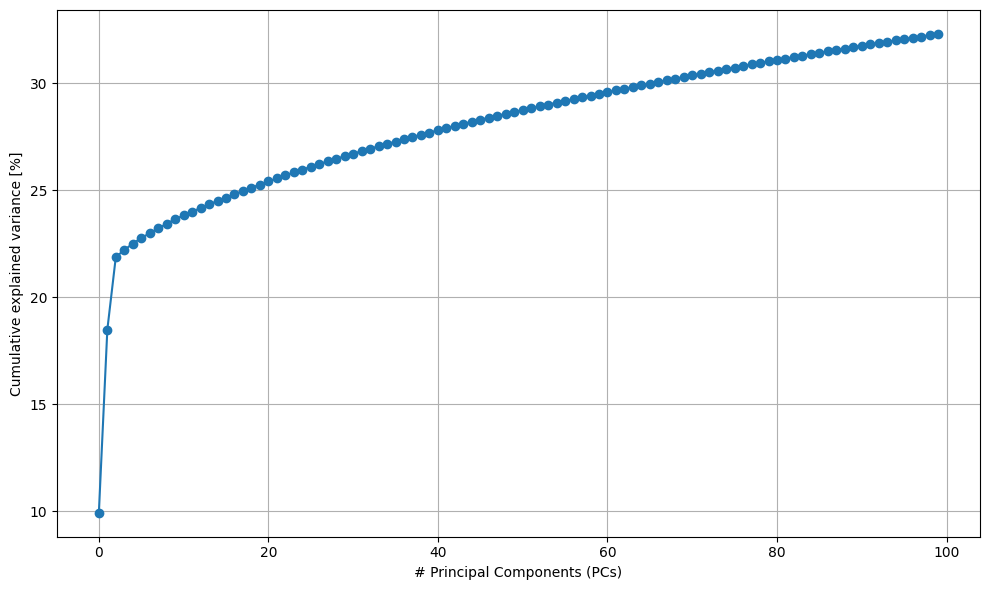

[ 9.928489   18.48994894 21.88017538 22.206786   22.5035011  22.76336947
 22.99307144 23.21485642 23.43201942 23.64197135 23.82377112 23.99881635
 24.16732065 24.33517028 24.49846924 24.65772635 24.8142405  24.96594041
 25.11552194 25.26307805 25.40817762 25.55070773 25.6913073  25.8278085
 25.96031546 26.09230279 26.22175785 26.34665783 26.46686152 26.58643044
 26.70533014 26.82325399 26.93862206 27.05248282 27.16171112 27.27035951
 27.37794341 27.48484984 27.59043925 27.69564072 27.79984838 27.90146633
 28.00194144 28.1011849  28.1988152  28.29361486 28.38630111 28.47714154
 28.56754118 28.65629052 28.74446229 28.831608   28.91778803 29.00290941
 29.0872992  29.17104861 29.25419242 29.33705584 29.4190005  29.50019438
 29.58111112 29.66174521 29.74134557 29.82057085 29.89980085 29.97852759
 30.05701093 30.13510705 30.21268624 30.28949943 30.36564656 30.44112908
 30.51528707 30.58840191 30.66072153 30.73269057 30.80381121 30.87427884
 30.94463865 31.01460017 31.08401967 31.15307535 31.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.grid()
plt.tight_layout()
plt.show()

print(perc_cumul_exp_var)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

# Section 4

## Install Requirements

In [ ]:
!pip install contractions
!pip install psutil
!pip install pytorch-transformers
!pip install transformers
!pip install keras-tuner --upgrade
!pip install torch torchvision  torchaudio -f https://download.pytorch.org/whl/torch_stable.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_6

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Load and Clean Data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_supervised.csv')
#df = pd.read_csv('df_lemmatized.csv',keep_default_na=False)
gender_label = pd.read_csv('target_supervised.csv')

In [ ]:
import re
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopword = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


def initial_clean(text):
      # lowercasing
      text = str(text).lower()
      # fix contractions
      text = contractions.fix(text)
      # remove urls
      url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
      text = re.sub(url_pattern, "", text)
      # remove punctuations
      ##text  = "".join([char if char not in string.punctuation else " " for char in text])
      return text

#The goal of lemmatization is to normalize words so that variations of the same word
#are treated as the same word for analysis purposes.

def lemmatize(text_tokens):
    tokens = [lemmatizer.lemmatize(token) for token in text_tokens if token.isalpha() and token not in stopword ]
    return tokens

def clean(text):
    if text=="":
        return text
    text = initial_clean(text)
    # tokenization
    text_tokens = word_tokenize(text)
    text_tokens = lemmatize(text_tokens)
    text = ' '.join(text_tokens)
    # remove extra spaces
    text = re.sub(' +', ' ', text)
    return text
df['cleaned_comment'] = df['body'].apply(lambda row: clean(row))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.drop(columns=['body'],inplace=True)
df.to_csv('df_lemmatized.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296042 entries, 0 to 296041
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   author           296042 non-null  object 
 1   subreddit        296042 non-null  object 
 2   created_utc      296042 non-null  float64
 3   cleaned_comment  296042 non-null  object 
dtypes: float64(1), object(3)
memory usage: 9.0+ MB


## Section4.2 - Subreddit Matrix




In [ ]:
grouped_comments= df.groupby('author')['cleaned_comment'].apply(lambda x: ' '.join(x)).reset_index()
grouped_comments_labeled = pd.merge(grouped_comments, gender_label ,on="author")

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

def get_subreddit_matrix(df, grouped_comments):
  # Create a list of unique users and subreddits
  unique_authors = grouped_comments['author']
  unique_subreddits = df['subreddit'].unique()

  author_row_map = {author: idx for idx, author in enumerate(unique_authors)}
  # Initialize a user-subreddit matrix
  author_subreddit_matrix = np.zeros((len(unique_authors), len(unique_subreddits)))

  # Populate the matrix with the number of times each user has posted in each subreddit
  for _, row in df.iterrows():
      author_index = author_row_map[row['author']]
      subreddit_index = np.where(unique_subreddits == row['subreddit'])[0][0]
      author_subreddit_matrix[author_index, subreddit_index] += 1

  # Normalize each row of the matrix
  author_subreddit_matrix_normalized = author_subreddit_matrix / author_subreddit_matrix.sum(axis=1, keepdims=True)
  return author_row_map, author_subreddit_matrix_normalized

author_row_map, author_subreddit_matrix_normalized = get_subreddit_matrix(df,grouped_comments)

In [ ]:
# Determine the number of components required
svd = TruncatedSVD(n_components=1000)
svd.fit(author_subreddit_matrix_normalized)

# Access the explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_

# Compute the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio > 0.95) + 5
print(n_components)



806


In [ ]:
svd = TruncatedSVD(n_components=n_components)
author_subreddit_matrix_reduced = svd.fit_transform(author_subreddit_matrix_normalized)
svd.explained_variance_ratio_.cumsum()[-1]

0.9503154189596873

In [ ]:
#np.save('author_subreddit_matrix_reduced.npy',author_subreddit_matrix_reduced)

In [ ]:
# Load saved matrix
author_row_map = {author: idx for idx, author in enumerate(grouped_comments['author'])}
author_subreddit_matrix_reduced = np.load('author_subreddit_matrix_reduced.npy')

## Section4.3 Encode and Prepare Data

In [ ]:
import gc
import torch

from transformers import DistilBertTokenizer, DistilBertModel
from tqdm import tqdm


def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


def embed_text(df, max_length=512):
    #tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
    #model = LongformerModel.from_pretrained('allenai/longformer-base-4096')
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    model = DistilBertModel.from_pretrained('distilbert-base-uncased')
    encoded_texts = []
    for text in tqdm(df['cleaned_comment']):
        inputs = tokenizer(
            text,
            return_tensors='pt',
            max_length=max_length,
            truncation=True,
            padding='max_length',
            add_special_tokens=True
          )
        with torch.no_grad():
          outputs = model(**inputs)
        # embedding of cls
        #sentence_embedding = outputs[0][:,0,:].numpy()
        # mean pooling
        sentence_embedding = mean_pooling(outputs, inputs['attention_mask'])
        encoded_texts.append(sentence_embedding)
        del inputs, outputs
        gc.collect()
    return encoded_texts

sentence_embeddings_all = []
for i in range(0, 5000, 1000):
  sentence_embeddings = np.array(embed_text(grouped_comments_labeled[i:i+1000]))
  np.savez_compressed(f'sentence_embeddings_{i}.npz',sentence_embeddings)
  sentence_embeddings_all.append(sentence_embeddings)

#NOTE: Due to RAM limitation we've splitted the data, embedded each split and then concatenated them all
#NOTE: DistillBert is smaller and faster version of BERT model with 97% of BERT's performance
#NOTE: we've tried both mean_pooling and [cls] embedding to encode the text. The former one outperformed the latter one.

100%|██████████| 1000/1000 [21:33<00:00,  1.29s/it]


In [ ]:
#embeddings_all = np.concatenate(tuple(sentence_embeddings_all))
#embeddings_all = embeddings_all.squeeze()
#np.savez_compressed(f'embeddings_all.npz',embeddings_all)
embeddings_all=np.load('embeddings_all.npz')['arr_0']

In [ ]:
embeddings_all.shape

(5000, 768)

In [ ]:
input_matrix = np.concatenate((author_subreddit_matrix_reduced,embeddings_all),axis=1)

### Split Train Test data

In [ ]:
from sklearn.model_selection import train_test_split

combined_data = list(zip(grouped_comments_labeled.values, input_matrix))

# Split the combined data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Unzip the training and testing sets into separate DataFrames and TF-IDF matrices
train_df, X_train = zip(*train_data)
train_df = pd.DataFrame(train_df, columns=grouped_comments_labeled.columns)
X_train = np.array(X_train)
y_train = np.array(train_df['gender'])

test_df, X_test = zip(*test_data)
test_df = pd.DataFrame(test_df, columns=grouped_comments_labeled.columns)
X_test = np.array(X_test)
y_test = np.array(test_df['gender'])


## Section4.4 Neural Network Model

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import roc_auc_score

logit = LogisticRegression(C=1, max_iter=100,n_jobs=4)
logit.fit(X_train, y_train)
cv_scores = cross_val_score(logit, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
y_pred = logit.predict(X_test)
roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])

0.8424817872753764

In [ ]:
!pip install psutil

import psutil
import os
import gc

def clear_memory():
    process = psutil.Process(os.getpid())
    print("Memory used before clearing:", process.memory_info().rss / 1024 / 1024, "MB")
    gc.collect()
    process = psutil.Process(os.getpid())
    print("Memory used after clearing:", process.memory_info().rss / 1024 / 1024, "MB")

# Call this function whenever you want to clear memory
clear_memory()

Memory used before clearing: 6597.01953125 MB
Memory used after clearing: 6597.05859375 MB


### Base

In [ ]:
import numpy as np
import keras
import keras_tuner

from keras import regularizers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Balancing class weights
initial_bias = np.log([sum(y_train)/(len(y_train)-sum(y_train))])
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))


model = Sequential([
        Dense(128, activation='relu',input_shape=(input_matrix.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid',bias_initializer=keras.initializers.Constant(initial_bias))
    ])


model.compile(optimizer=Adam(5e-5), loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='auc')])
model.summary()

In [ ]:
class PrintMetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nEpoch:", epoch+1)
        print("Train Loss:", logs['loss'])
        print("Val Loss:", logs['val_loss'])
        print("Train Accuracy:", logs['accuracy'])
        print("Val Accuracy:", logs['val_accuracy'])

print_metrics_callback = PrintMetricsCallback()

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True
    )
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=300, batch_size=8,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[print_metrics_callback])

# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

Epoch 1/300
445/450 [============================>.] - ETA: 0s - loss: 1.6474 - accuracy: 0.7267 - auc: 0.5235 - prc: 0.2881
Epoch: 1
Train Loss: 1.6460988521575928
Val Loss: 1.4016119241714478
Train Accuracy: 0.7269444465637207
Val Accuracy: 0.7799999713897705
450/450 [==============================] - 10s 14ms/step - loss: 1.6461 - accuracy: 0.7269 - auc: 0.5224 - prc: 0.2865 - val_loss: 1.4016 - val_accuracy: 0.7800 - val_auc: 0.5784 - val_prc: 0.3167
Epoch 2/300
447/450 [============================>.] - ETA: 0s - loss: 1.5710 - accuracy: 0.6904 - auc: 0.5119 - prc: 0.2824
Epoch: 2
Train Loss: 1.5700352191925049
Val Loss: 1.4258160591125488
Train Accuracy: 0.690833330154419
Val Accuracy: 0.7799999713897705
450/450 [==============================] - 5s 11ms/step - loss: 1.5700 - accuracy: 0.6908 - auc: 0.5114 - prc: 0.2813 - val_loss: 1.4258 - val_accuracy: 0.7800 - val_auc: 0.5831 - val_prc: 0.3426
Epoch 3/300
447/450 [============================>.] - ETA: 0s - loss: 1.5259 - accu

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid()
  plt.legend()
  plt.show()
plot_loss(history)

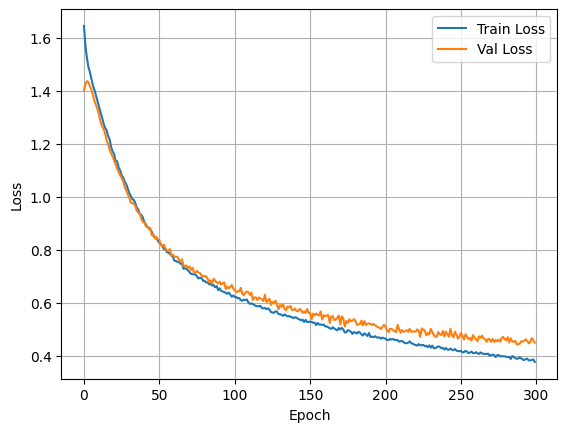

In [ ]:
plot_loss(history)

The model is still learning so, we continue the learning

In [ ]:
history2 = model.fit(
    X_train, y_train,
    epochs=200, batch_size=8,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[print_metrics_callback])


Epoch 1/100
450/450 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.8872 - auc: 0.9544 - prc: 0.8913
Epoch: 1
Train Loss: 0.32984334230422974
Val Loss: 0.41229796409606934
Train Accuracy: 0.8872222304344177
Val Accuracy: 0.8525000214576721
450/450 [==============================] - 6s 14ms/step - loss: 0.3298 - accuracy: 0.8872 - auc: 0.9544 - prc: 0.8913 - val_loss: 0.4123 - val_accuracy: 0.8525 - val_auc: 0.8713 - val_prc: 0.7655
Epoch 2/100
446/450 [============================>.] - ETA: 0s - loss: 0.3278 - accuracy: 0.8899 - auc: 0.9554 - prc: 0.8900
Epoch: 2
Train Loss: 0.3294997215270996
Val Loss: 0.420179545879364
Train Accuracy: 0.8897222280502319
Val Accuracy: 0.8525000214576721
450/450 [==============================] - 4s 9ms/step - loss: 0.3295 - accuracy: 0.8897 - auc: 0.9548 - prc: 0.8897 - val_loss: 0.4202 - val_accuracy: 0.8525 - val_auc: 0.8708 - val_prc: 0.7670
Epoch 3/100
448/450 [============================>.] - ETA: 0s - loss: 0.3288 - accu

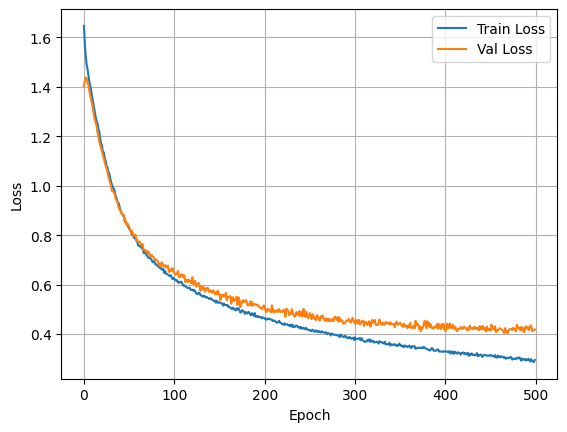

In [ ]:
history.history['loss'].extend(history2.history['loss'])
history.history['val_loss'].extend(history2.history['val_loss'])
plot_loss(history)

In [ ]:
# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       710
           1       0.68      0.73      0.71       290

    accuracy                           0.82      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.83      0.82      0.83      1000

AUC Score: 0.8744924720738222


It has converged at epoch ~400, So we should stop training at epoch 400 for this configuration of MLP model. Note that the validation loss is not going up yet.

Epoch 1/50
446/450 [============================>.] - ETA: 0s - loss: 0.6412 - accuracy: 0.6646 - auc: 0.7126 - prc: 0.4870
Epoch: 1
Train Loss: 0.6400520205497742
Val Loss: 0.5669969320297241
Train Accuracy: 0.6652500033378601
Val Accuracy: 0.75
450/450 [==============================] - 6s 10ms/step - loss: 0.6401 - accuracy: 0.6653 - auc: 0.7129 - prc: 0.4864 - val_loss: 0.5670 - val_accuracy: 0.7500 - val_auc: 0.7942 - val_prc: 0.5294
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 0.5423 - accuracy: 0.7425 - auc: 0.8073 - prc: 0.6155
Epoch: 2
Train Loss: 0.5423250794410706
Val Loss: 0.6275832653045654
Train Accuracy: 0.7425000071525574
Val Accuracy: 0.6600000262260437
450/450 [==============================] - 5s 11ms/step - loss: 0.5423 - accuracy: 0.7425 - auc: 0.8073 - prc: 0.6155 - val_loss: 0.6276 - val_accuracy: 0.6600 - val_auc: 0.8199 - val_prc: 0.6593
Epoch 3/50
448/450 [============================>.] - ETA: 0s - loss: 0.5107 - accuracy: 0.7595 - au

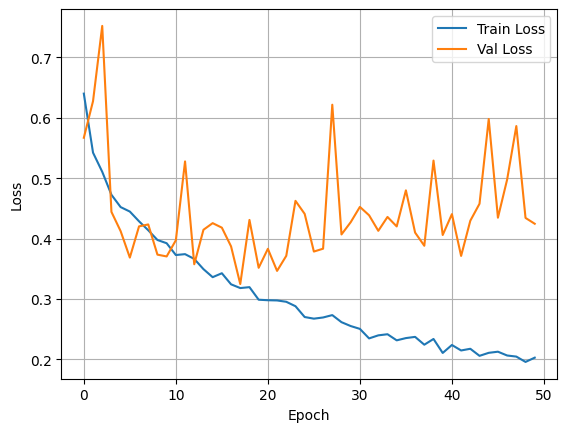

In [ ]:
model = Sequential([
        Dense(128, activation='relu', input_shape=(input_matrix.shape[1],)),
        Dropout(0.5),
        #Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
        #Dropout(0.3),
        Dense(1, activation='sigmoid',bias_initializer=keras.initializers.Constant(initial_bias))
    ])


model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[print_metrics_callback])
plot_loss(history)

For this configuration we need to stop training at epoch 10, where the validation loss is going up and them model is getting overfitted

In [ ]:
# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       710
           1       0.72      0.63      0.67       290

    accuracy                           0.82      1000
   macro avg       0.79      0.77      0.78      1000
weighted avg       0.82      0.82      0.82      1000

AUC Score: 0.8627367654201068


In [ ]:
model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=8,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[print_metrics_callback])

Epoch 1/10
447/450 [============================>.] - ETA: 0s - loss: 0.1942 - accuracy: 0.9248 - auc: 0.9674 - prc: 0.9299
Epoch: 1
Train Loss: 0.19472378492355347
Val Loss: 0.5157363414764404
Train Accuracy: 0.9242500066757202
Val Accuracy: 0.8050000071525574
450/450 [==============================] - 3s 5ms/step - loss: 0.1947 - accuracy: 0.9243 - auc: 0.9673 - prc: 0.9293 - val_loss: 0.5157 - val_accuracy: 0.8050 - val_auc: 0.8488 - val_prc: 0.7039
Epoch 2/10
442/450 [============================>.] - ETA: 0s - loss: 0.1860 - accuracy: 0.9330 - auc: 0.9798 - prc: 0.9516
Epoch: 2
Train Loss: 0.18497933447360992
Val Loss: 0.5372897982597351
Train Accuracy: 0.933055579662323
Val Accuracy: 0.8174999952316284
450/450 [==============================] - 2s 4ms/step - loss: 0.1850 - accuracy: 0.9331 - auc: 0.9800 - prc: 0.9522 - val_loss: 0.5373 - val_accuracy: 0.8175 - val_auc: 0.8568 - val_prc: 0.7141
Epoch 3/10
448/450 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy

In [ ]:
# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

32/32 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       710
           1       0.69      0.68      0.69       290

    accuracy                           0.82      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.82      0.82      0.82      1000

AUC Score: 0.8612190383681398


## Section4.5 Hyperparameter tuning

### Keras Tuner

In [ ]:

def tuner_make_model(hp,  metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = keras.initializers.Constant(output_bias)
  model = keras.Sequential()
  model.add(Dense(
      hp.Choice('units', [64, 128,256,512]),
      activation='relu')
  )
  model.add(keras.layers.Dropout(hp.Choice('dropout_rate', values=[0.3, 0.5])))
  '''
  model.add(Dense(
      hp.Choice('units', [64,32]),
      activation='relu')
  )
  model.add(keras.layers.Dropout(0.3))
  '''
  model.add(keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias))
  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 4e-4,5e-5,6e-6])),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model


"\nmodel = Sequential([\n        Dense(128, activation='relu', input_shape=(input_matrix.shape[1],)),\n        Dropout(0.5),\n        Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),\n        Dropout(0.3),\n        Dense(1, activation='sigmoid',bias_initializer=keras.initializers.Constant(initial_bias))\n    ])\n\n\nprint_metrics_callback = PrintMetricsCallback()\n"

In [ ]:
hp = keras_tuner.HyperParameters()
class MyTuner(keras_tuner.tuners.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):

    kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size',
                                         values=[4,8,16,32],
                                         default=16)
    return super(MyTuner, self).run_trial(trial, *args, **kwargs)


tuner = MyTuner(
    tuner_make_model,
    max_trials=20,
    # Do not resume the previous search in the same directory.
    overwrite=True,
    # Pick the best model based on validation accuracy
    objective=keras_tuner.Objective("val_auc", direction="max"),
    # Set a directory to store the intermediate results.
    directory="/tuner",
    )

tuner.search(X_train, y_train, epochs=50, validation_split=0.1)


Trial 20 Complete [00h 01m 23s]
val_auc: 0.7838360071182251

Best val_auc So Far: 0.8807364702224731
Total elapsed time: 01h 07m 35s


In [ ]:
best_hp

In [ ]:
# Train the model

best_model = tuner.get_best_models()[0]
# Evaluate the model on test set
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

32/32 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       710
           1       0.72      0.62      0.67       290

    accuracy                           0.82      1000
   macro avg       0.79      0.76      0.77      1000
weighted avg       0.81      0.82      0.81      1000

AUC Score: 0.8709422049538611


## BERT - using CLS embedding


In [ ]:
import gc
import torch

from transformers import BertTokenizer,BertModel
from tqdm import tqdm


def embed_text_bert(df, max_length=512):

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained("bert-base-uncased")
    encoded_texts = []
    for text in tqdm(df['cleaned_comment']):
        inputs = tokenizer(
            text,
            add_special_tokens=True,
            return_tensors='pt',
            max_length=max_length,
            truncation=True,
            padding='max_length'
            )
        with torch.no_grad():
          outputs = model(**inputs)
        sentence_embedding = outputs[0][:,0,:].numpy()
        encoded_texts.append(sentence_embedding)
        del inputs, outputs
        gc.collect()
    return encoded_texts
#bert_sentence_embeddings = np.array(embed_text_bert(grouped_comments_labeled[:1000]))
bert_sentence_embeddings_all = []
for i in range(0, 5000, 1000):
  bert_sentence_embeddings = np.array(embed_text_bert(grouped_comments_labeled[i:i+1000]))
  np.savez_compressed(f'lemma_bert_sentence_embeddings_{i}.npz',bert_sentence_embeddings)
  bert_sentence_embeddings_all.append(bert_sentence_embeddings)
#NOTE: Due to RAM limitation we've splitted the data, embedded each split and then concatenated them all


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 1000/1000 [44:59<00:00,  2.70s/it]


In [ ]:
#bert_sentence_embeddings = np.load('bert_sentence_embeddings_0.npz')['arr_0']
bert_embeddings_all = np.concatenate((bert_sentence_embeddings_all))
bert_embeddings_all = bert_embeddings_all.squeeze()
np.savez_compressed('lemma_bert_embeddings_all.npz',bert_embeddings_all)


In [ ]:
bert_embeddings_all=np.load('lemma_bert_embeddings_all.npz')['arr_0']

In [ ]:
input_matrix = np.concatenate((author_subreddit_matrix_reduced,bert_embeddings_all),axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

combined_data = list(zip(grouped_comments_labeled.values, input_matrix))

# Split the combined data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Unzip the training and testing sets into separate DataFrames and TF-IDF matrices
train_df, X_train = zip(*train_data)
train_df = pd.DataFrame(train_df, columns=grouped_comments_labeled.columns)
X_train = np.array(X_train)
y_train = np.array(train_df['gender'])

test_df, X_test = zip(*test_data)
test_df = pd.DataFrame(test_df, columns=grouped_comments_labeled.columns)
X_test = np.array(X_test)
y_test = np.array(test_df['gender'])


In [ ]:
clear_memory()

In [ ]:

import numpy as np
import keras
import keras_tuner

from keras import regularizers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
class PrintMetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nEpoch:", epoch+1)
        print("Train Loss:", logs['loss'])
        print("Val Loss:", logs['val_loss'])
        print("Train Accuracy:", logs['accuracy'])
        print("Val Accuracy:", logs['val_accuracy'])

METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Balancing class weights
initial_bias = np.log([sum(y_train)/(len(y_train)-sum(y_train))])
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))


model = Sequential([
        Dense(128, activation='relu', input_shape=(input_matrix.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid',bias_initializer=keras.initializers.Constant(initial_bias))
    ])


model.compile(optimizer=Adam(5e-5), loss='binary_crossentropy', metrics=METRICS)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               201600    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 209921 (820.00 KB)
Trainable params: 209921 (820.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

print_metrics_callback = PrintMetricsCallback()

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True
    )
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[print_metrics_callback])

# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

Epoch 1/50
444/450 [============================>.] - ETA: 0s - loss: 1.4986 - accuracy: 0.6116 - auc: 0.5754 - prc: 0.3520
Epoch: 1
Train Loss: 1.496911883354187
Val Loss: 1.3369563817977905
Train Accuracy: 0.6115000247955322
Val Accuracy: 0.7599999904632568
450/450 [==============================] - 4s 6ms/step - loss: 1.4969 - accuracy: 0.6115 - auc: 0.5761 - prc: 0.3532 - val_loss: 1.3370 - val_accuracy: 0.7600 - val_auc: 0.7237 - val_prc: 0.4733
Epoch 2/50
440/450 [============================>.] - ETA: 0s - loss: 1.3145 - accuracy: 0.6011 - auc: 0.6016 - prc: 0.3485
Epoch: 2
Train Loss: 1.3124293088912964
Val Loss: 1.2188278436660767
Train Accuracy: 0.602222204208374
Val Accuracy: 0.7049999833106995
450/450 [==============================] - 2s 5ms/step - loss: 1.3124 - accuracy: 0.6022 - auc: 0.6065 - prc: 0.3565 - val_loss: 1.2188 - val_accuracy: 0.7050 - val_auc: 0.7672 - val_prc: 0.5210
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 1.1811 - accuracy: 0

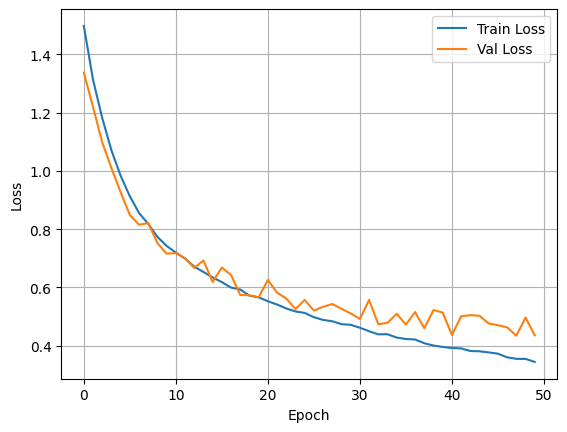

In [ ]:
plot_loss(history)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=16,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[print_metrics_callback])

# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print performance metrics
print(classification_report(y_test, y_pred_binary))
print("AUC Score:", roc_auc_score(y_test, y_pred))

Epoch 1/50
224/225 [============================>.] - ETA: 0s - loss: 0.3404 - accuracy: 0.8842 - auc: 0.9502 - prc: 0.8748
Epoch: 1
Train Loss: 0.34012481570243835
Val Loss: 0.44680255651474
Train Accuracy: 0.8841666579246521
Val Accuracy: 0.8125
225/225 [==============================] - 3s 9ms/step - loss: 0.3401 - accuracy: 0.8842 - auc: 0.9502 - prc: 0.8745 - val_loss: 0.4468 - val_accuracy: 0.8125 - val_auc: 0.8442 - val_prc: 0.7335
Epoch 2/50
222/225 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.8874 - auc: 0.9518 - prc: 0.8812
Epoch: 2
Train Loss: 0.3362373113632202
Val Loss: 0.4661586284637451
Train Accuracy: 0.8872222304344177
Val Accuracy: 0.8100000023841858
225/225 [==============================] - 2s 11ms/step - loss: 0.3362 - accuracy: 0.8872 - auc: 0.9519 - prc: 0.8830 - val_loss: 0.4662 - val_accuracy: 0.8100 - val_auc: 0.8443 - val_prc: 0.7348
Epoch 3/50
224/225 [============================>.] - ETA: 0s - loss: 0.3321 - accuracy: 0.8895 - au

In [ ]:

def tuner_make_model(hp,  metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = keras.initializers.Constant(output_bias)
  model = keras.Sequential()
  model.add(Dense(
      hp.Choice('units', [128,256,512]),
      activation='relu')
  )
  model.add(keras.layers.Dropout( 0.5))

  model.add(Dense(
      hp.Choice('units', [64,32]),
      activation='relu')
  )
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias))
  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 4e-4,5e-5,6e-6])),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model


In [ ]:
hp = keras_tuner.HyperParameters()
class MyTuner(keras_tuner.tuners.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):

    kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size',
                                         values=[4,8,16],
                                         default=8)
    return super(MyTuner, self).run_trial(trial, *args, **kwargs)


tuner = MyTuner(
    tuner_make_model,
    max_trials=20,
    # Do not resume the previous search in the same directory.
    overwrite=False,
    # Pick the best model based on validation accuracy
    objective=keras_tuner.Objective("val_auc", direction="max"),
    # Set a directory to store the intermediate results.
    directory="/tuner",
    )

tuner.search(X_train, y_train, epochs=100, validation_split=0.1)


Trial 20 Complete [00h 04m 22s]
val_auc: 0.8571532964706421

Best val_auc So Far: 0.8624708652496338
Total elapsed time: 03h 53m 18s


In [ ]:
best_hparams = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters:")
print(best_hparams.values)

Best Hyperparameters:
{'units': 128, 'learning_rate': 0.0004, 'batch_size': 4}


In [ ]:
128 4e-4 4